<a href="https://colab.research.google.com/github/janaghoniem/Housing-Prices-Prediction-using-Machine-Learning/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediciton

In [3349]:
pip install deap

In [3350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

In [3351]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing

In [3352]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')

In [3353]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3354]:
dataset.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3355]:
dataset.shape

(1460, 81)

In [3356]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3357]:
dataset.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


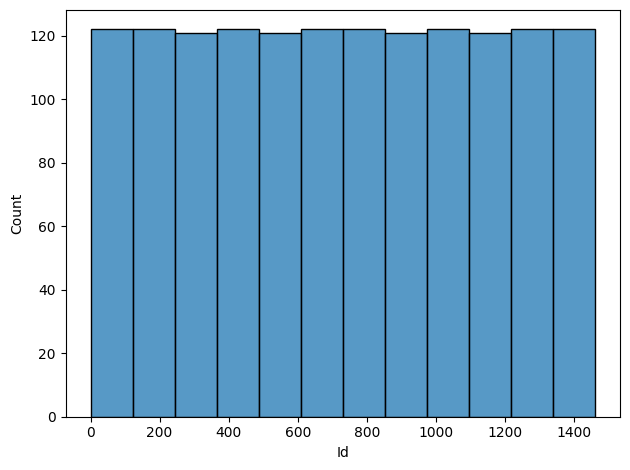

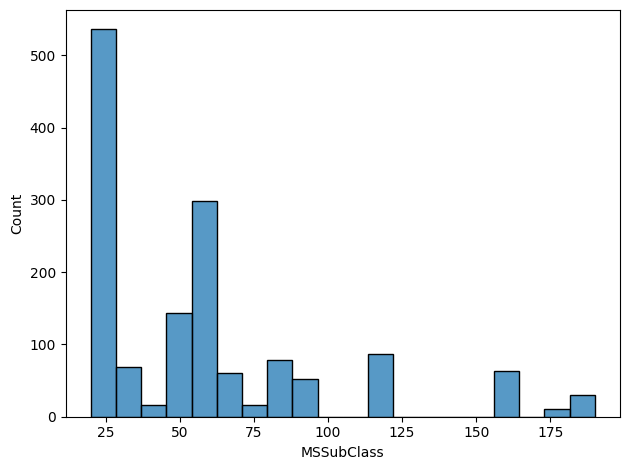

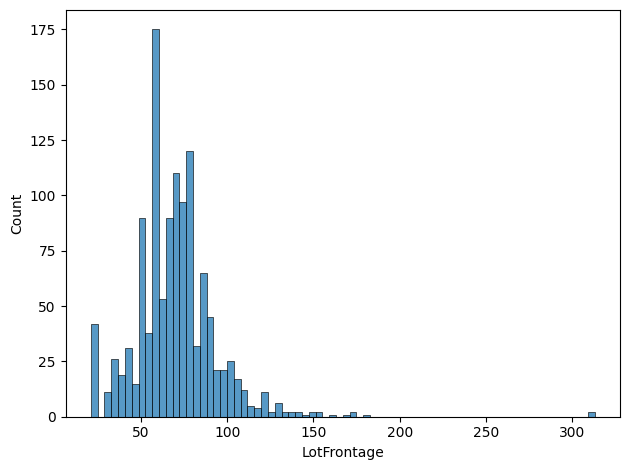

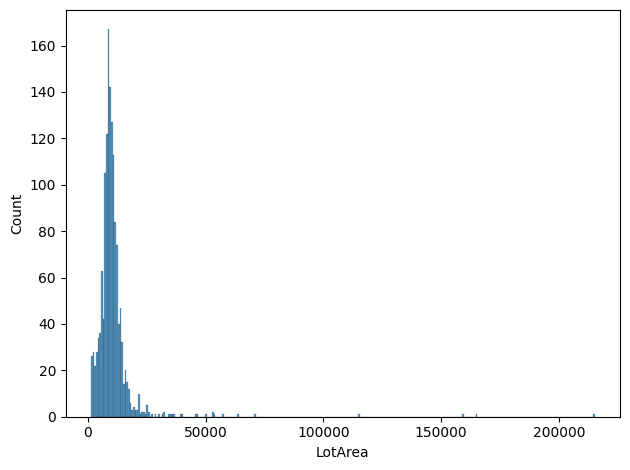

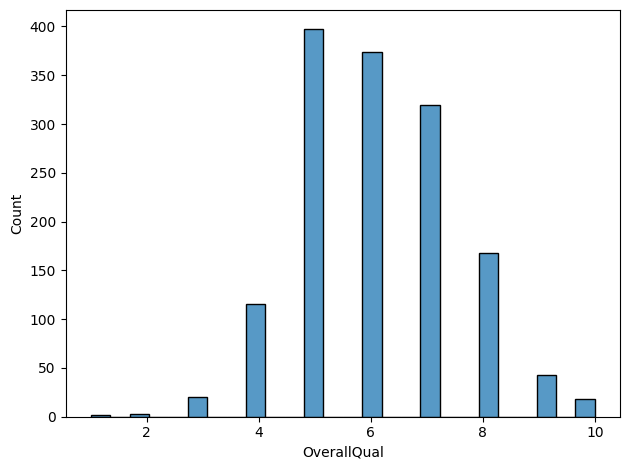

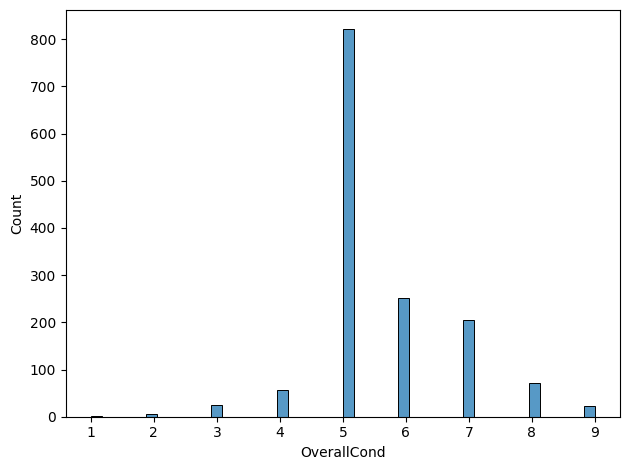

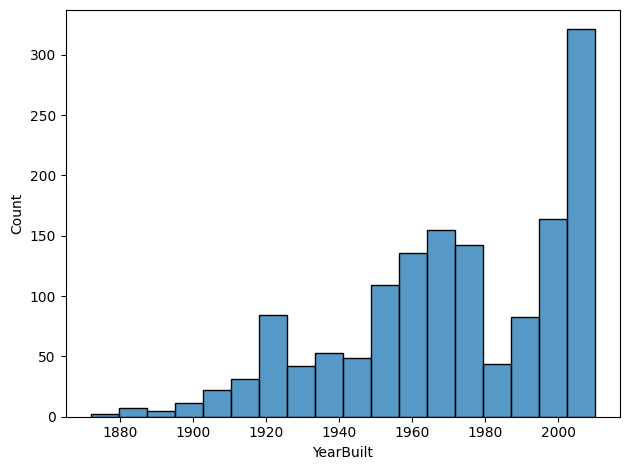

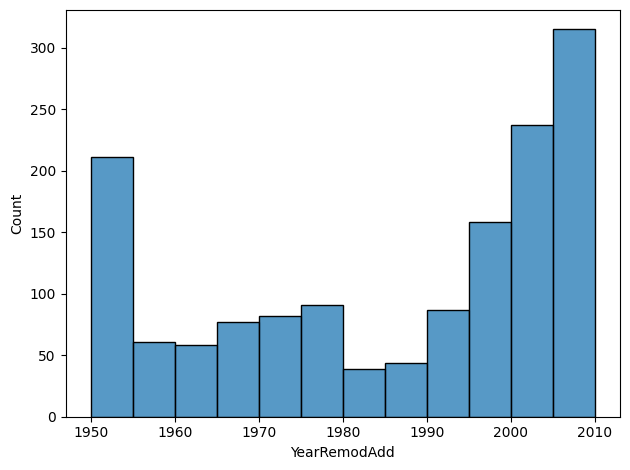

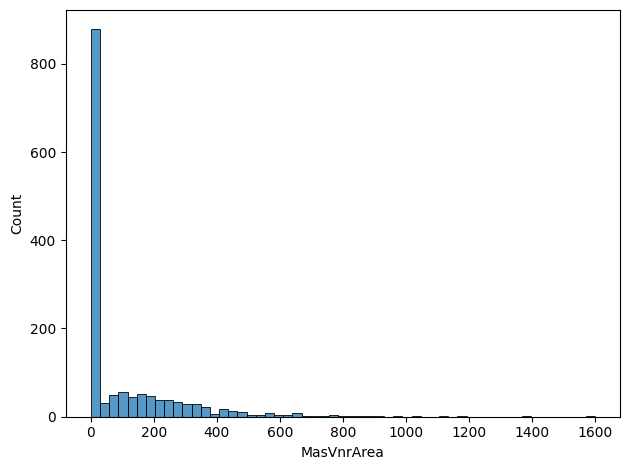

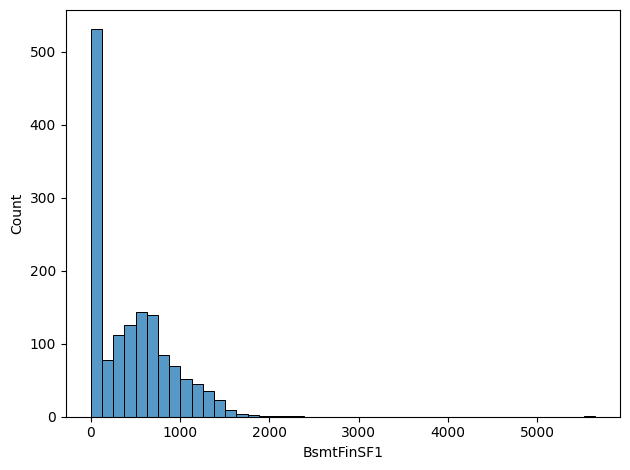

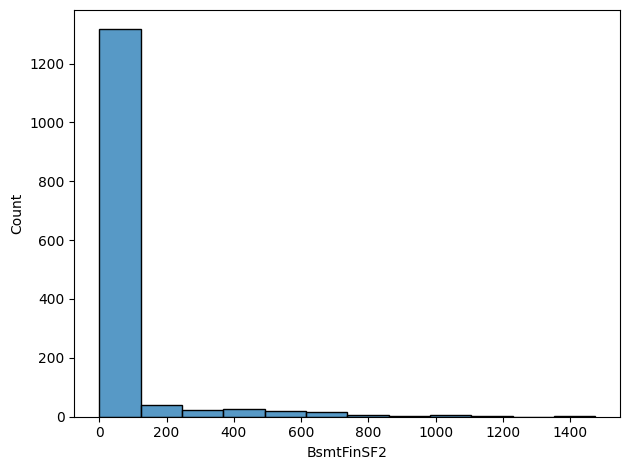

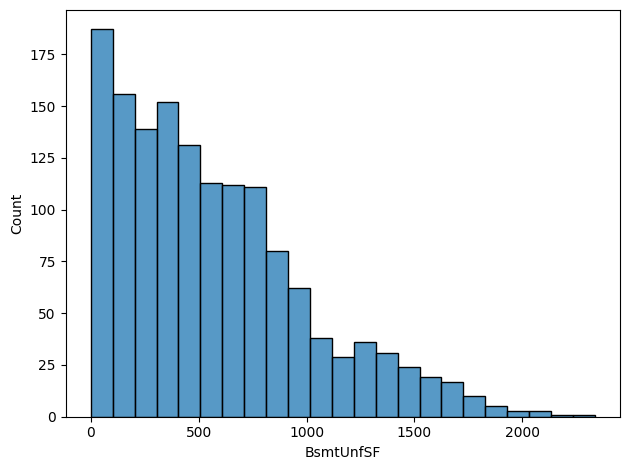

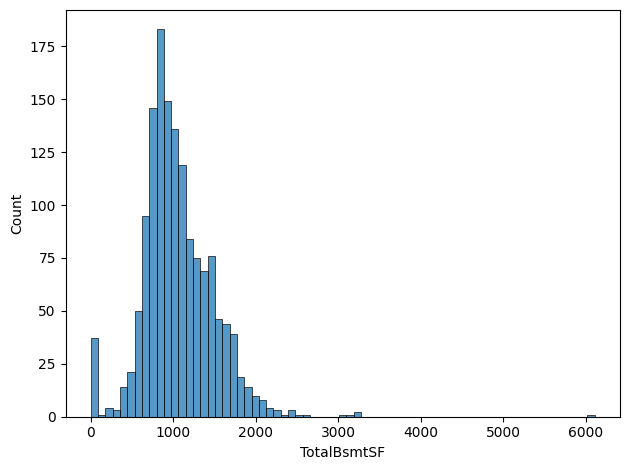

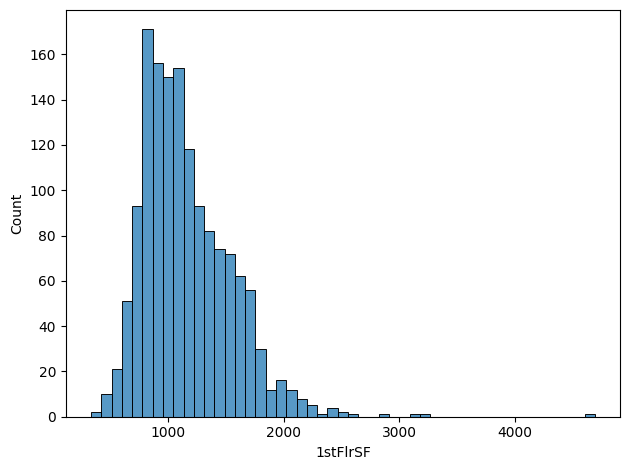

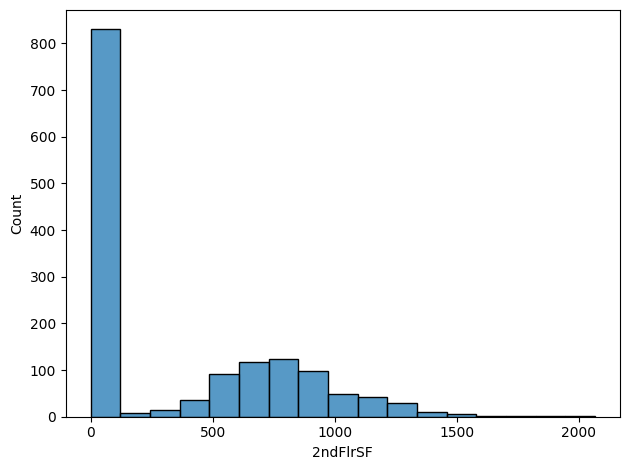

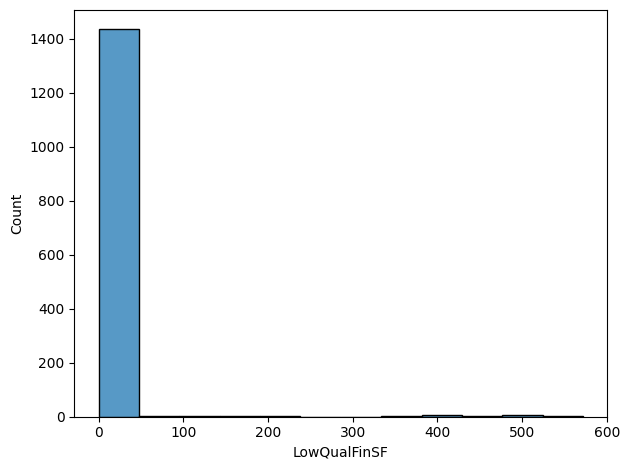

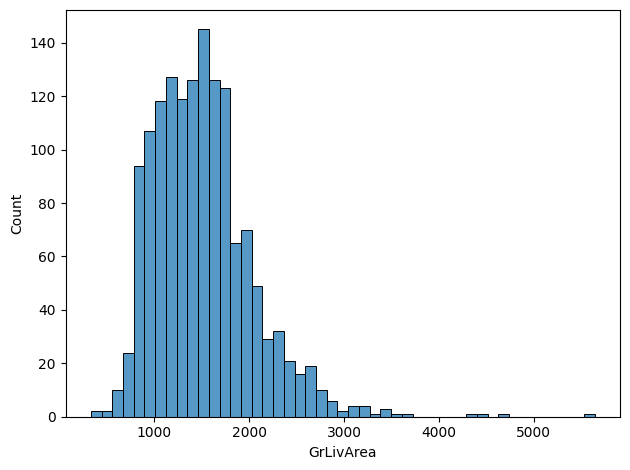

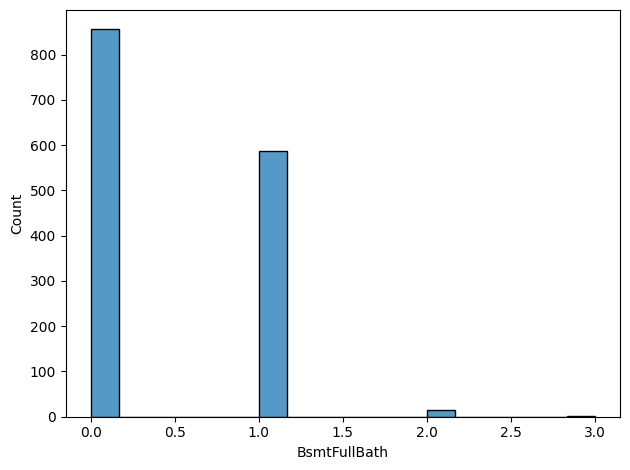

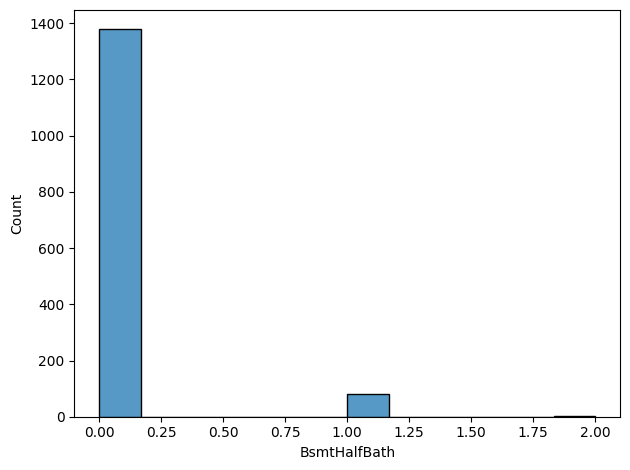

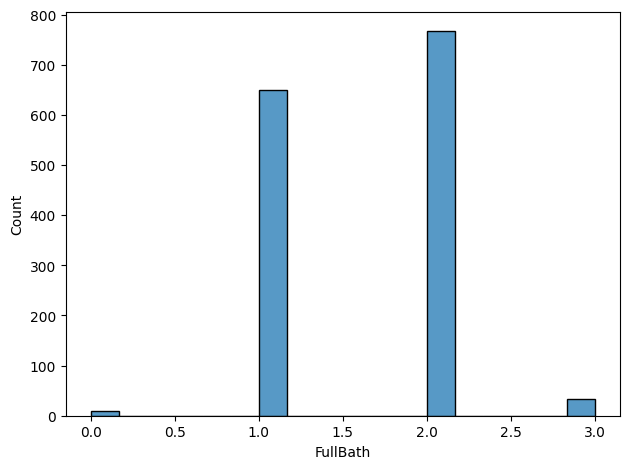

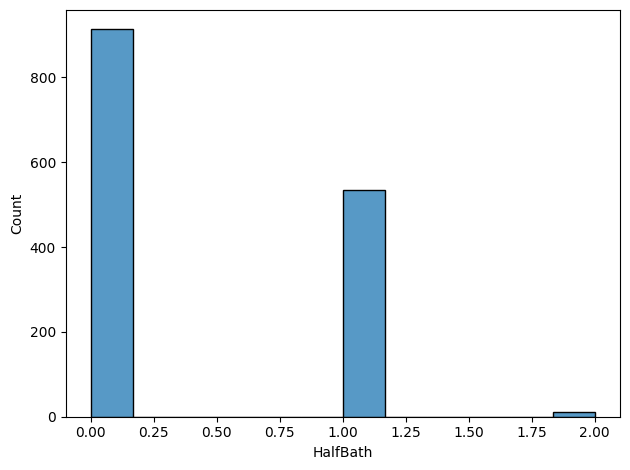

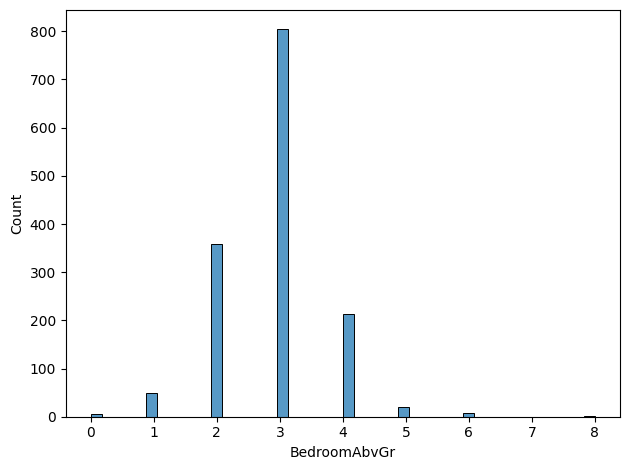

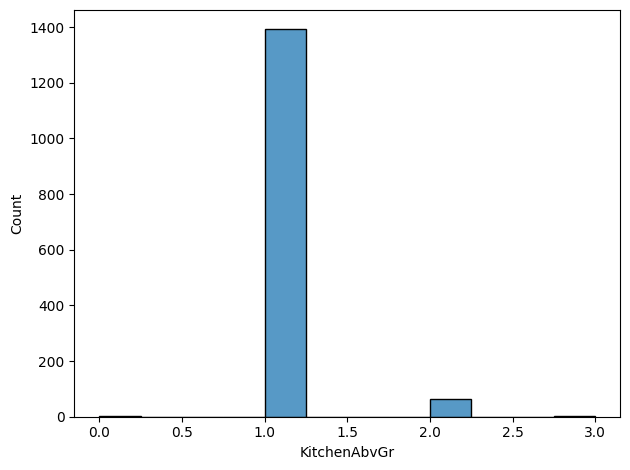

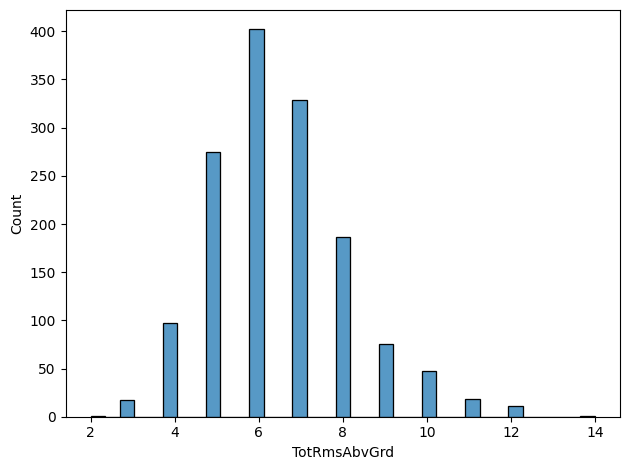

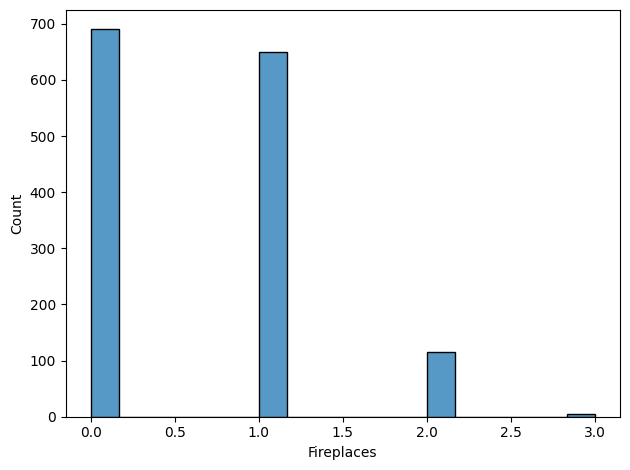

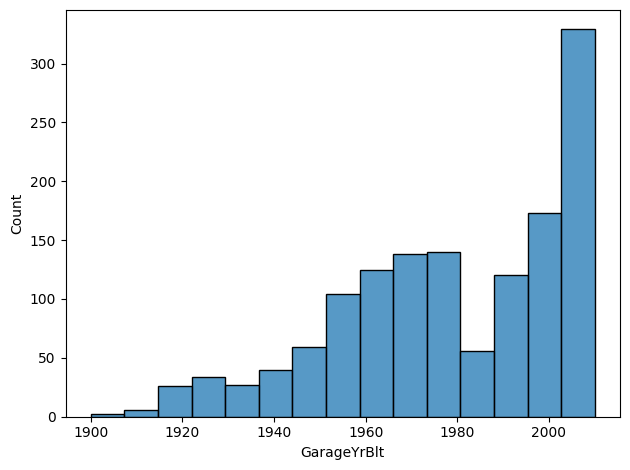

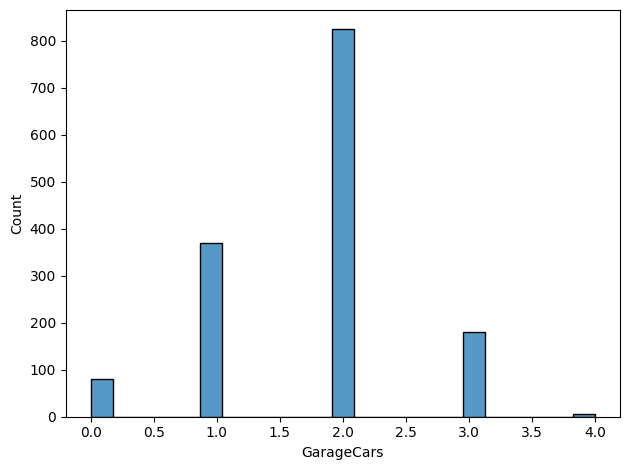

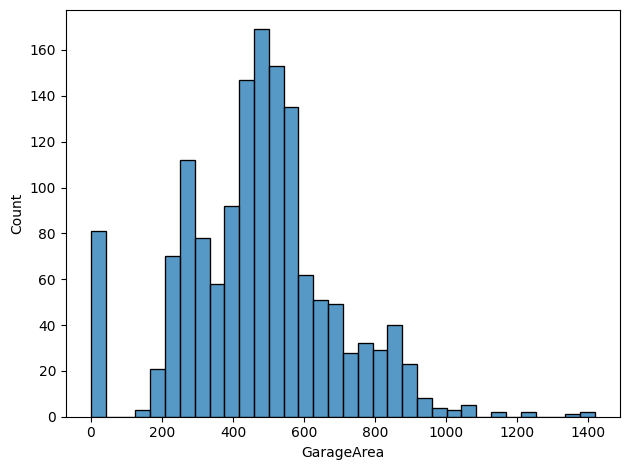

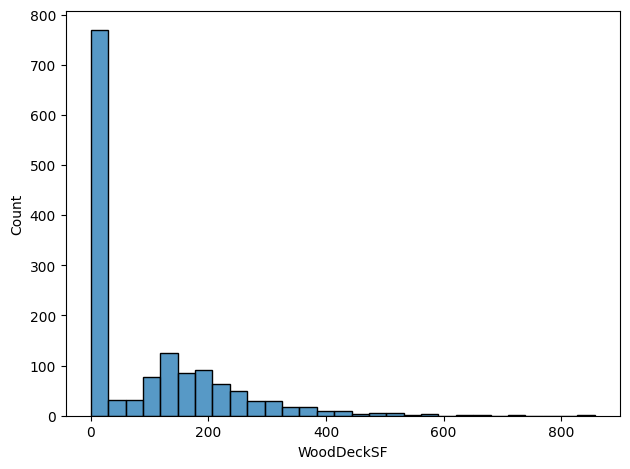

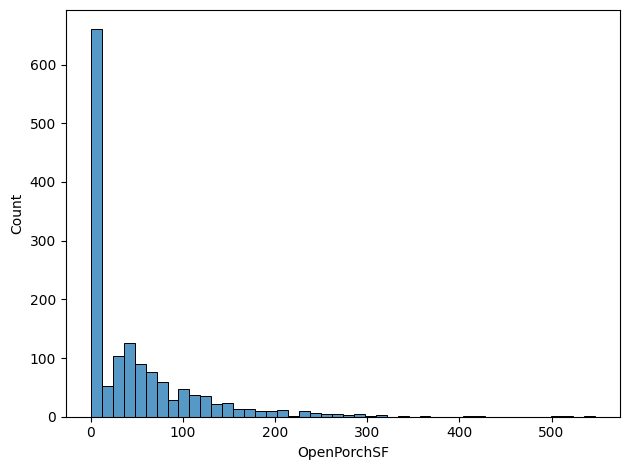

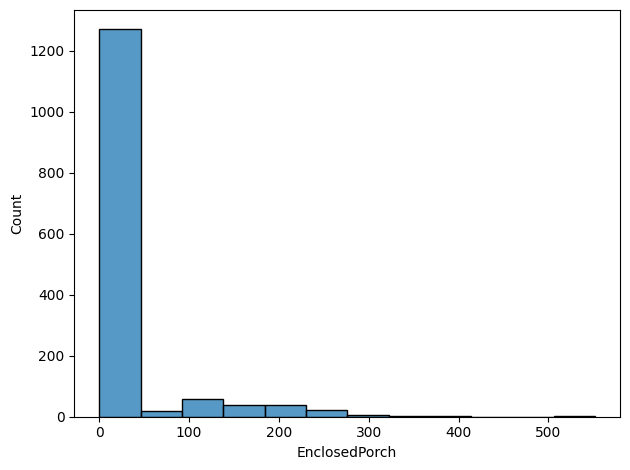

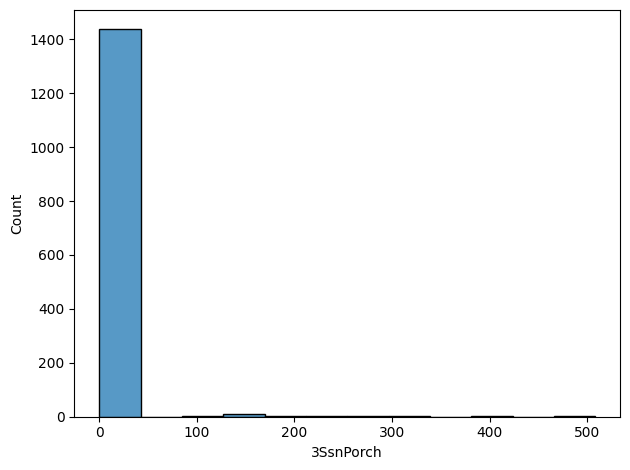

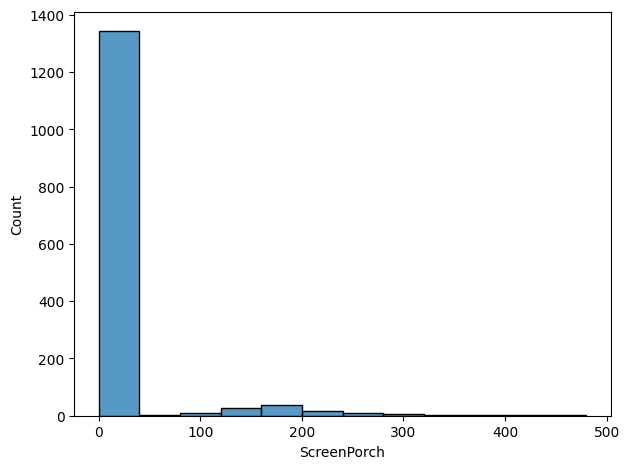

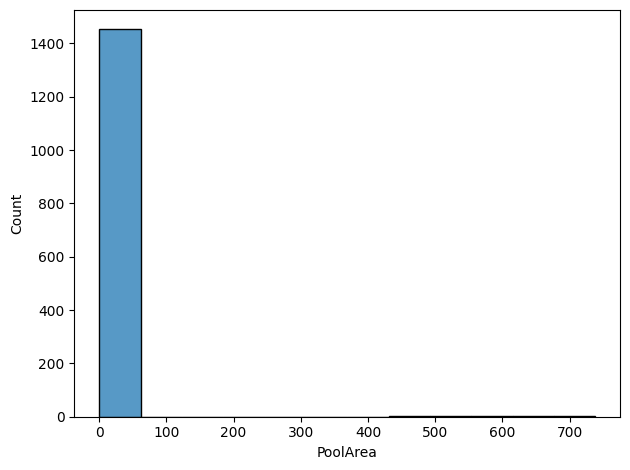

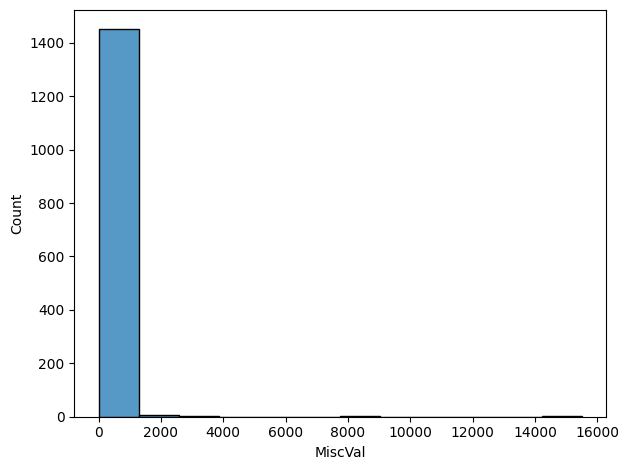

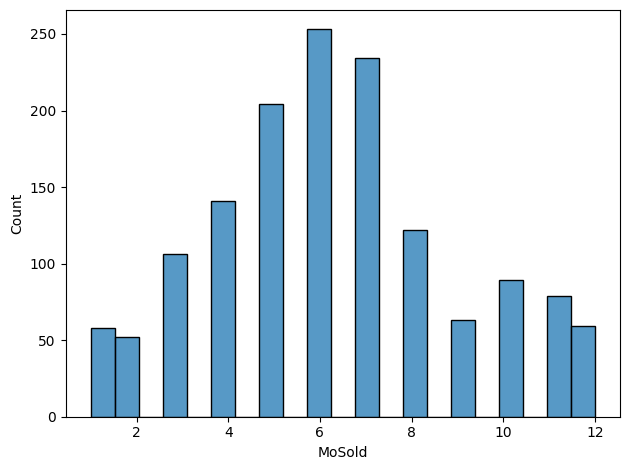

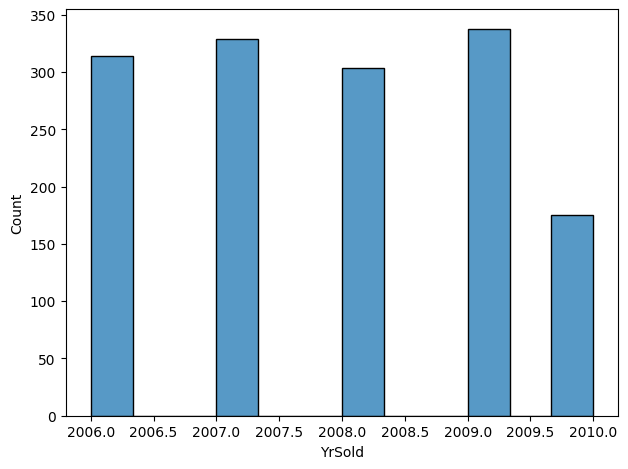

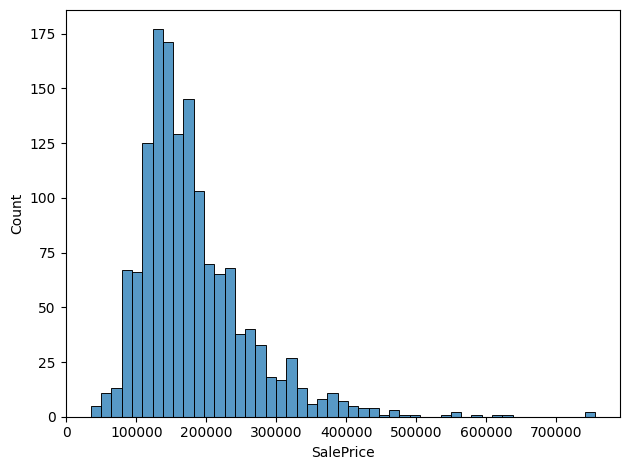

In [3358]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.histplot(data=dataset,x=i)
  plt.tight_layout()
  plt.show()

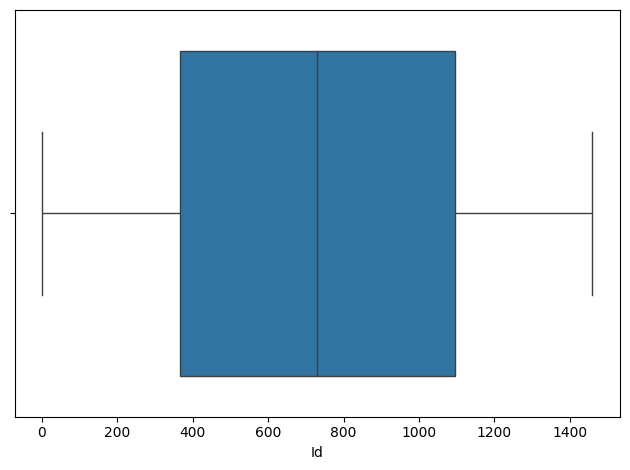

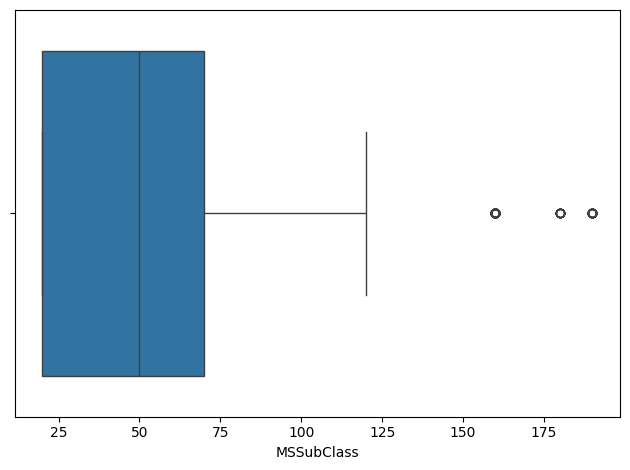

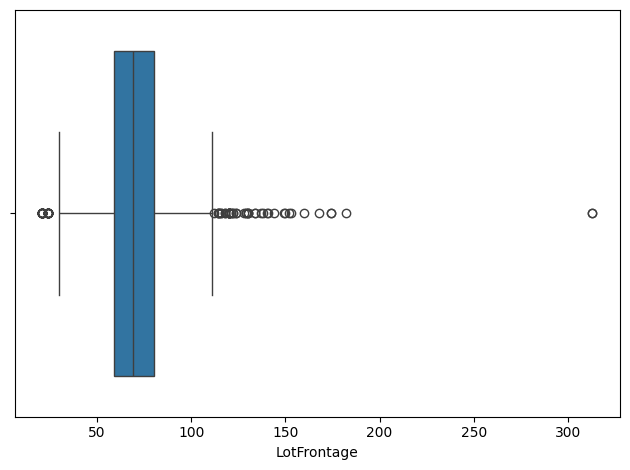

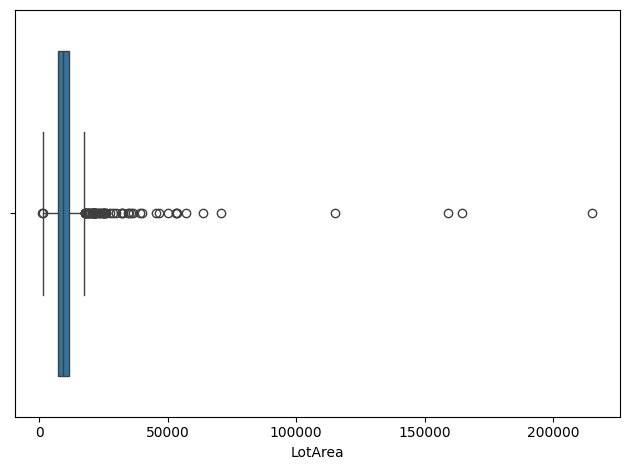

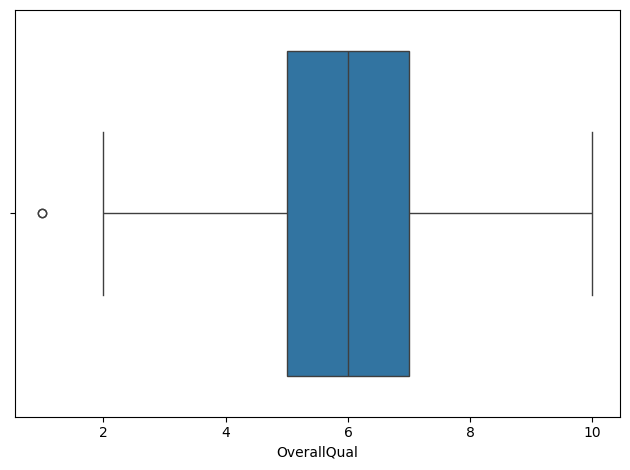

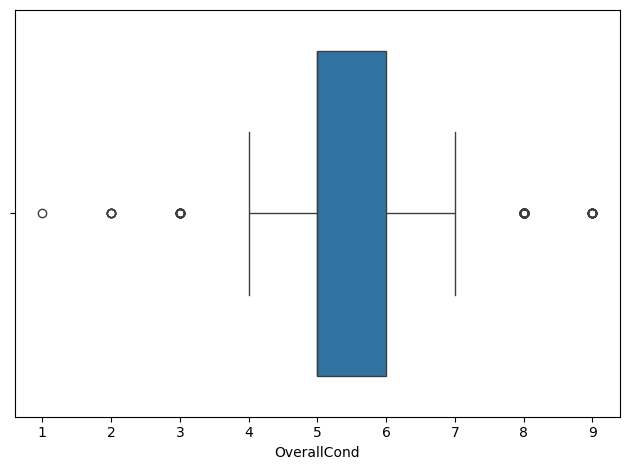

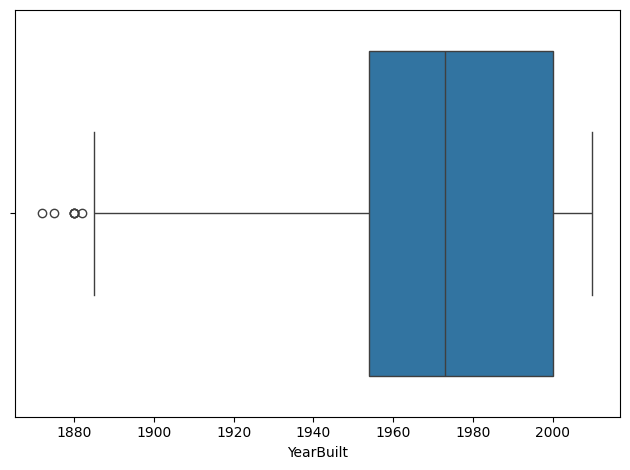

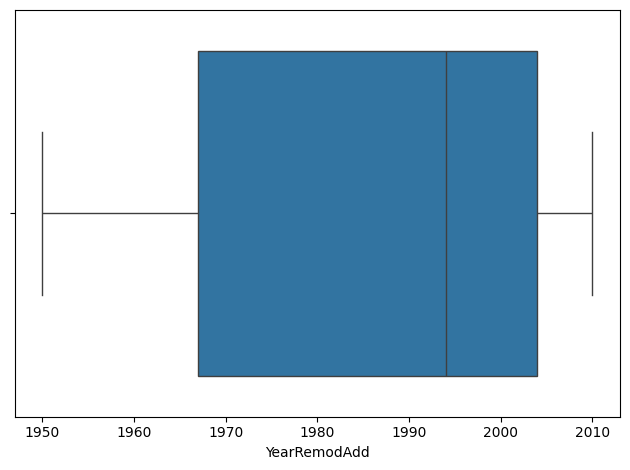

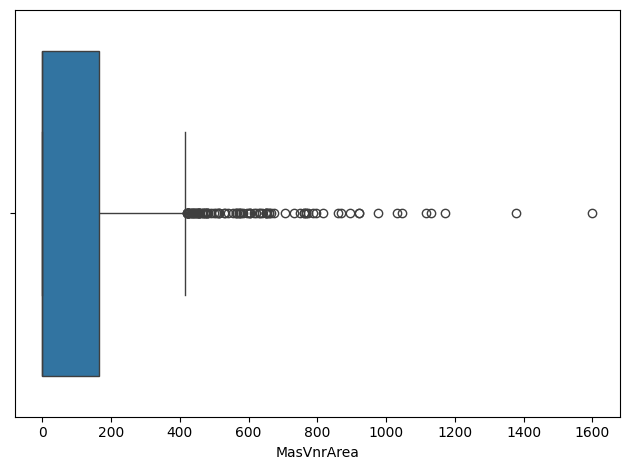

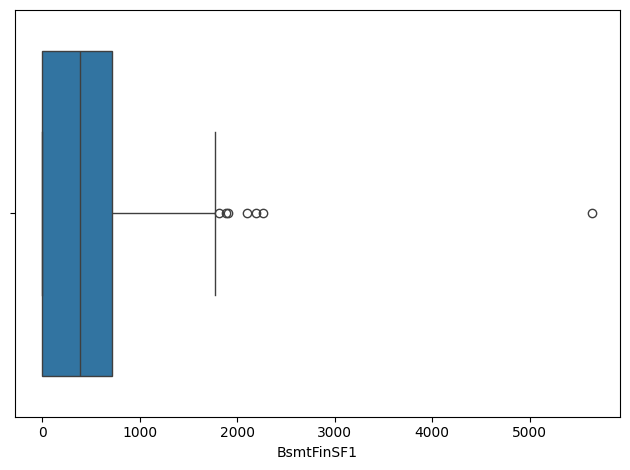

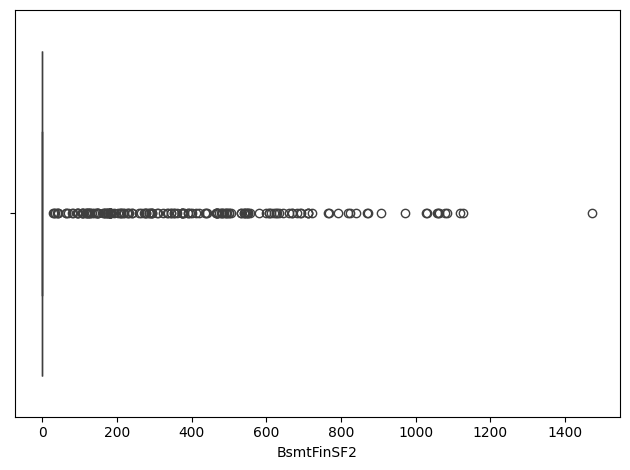

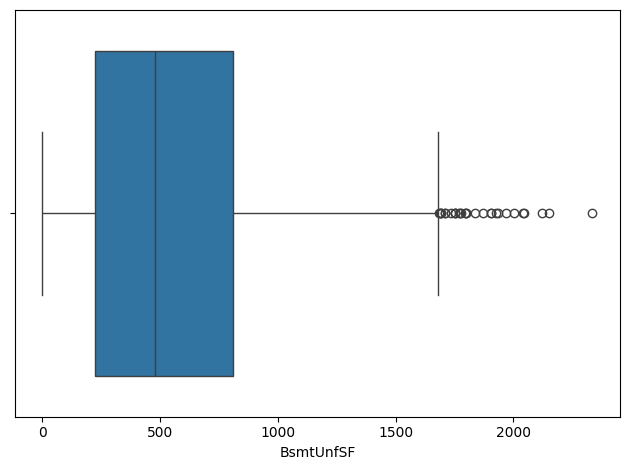

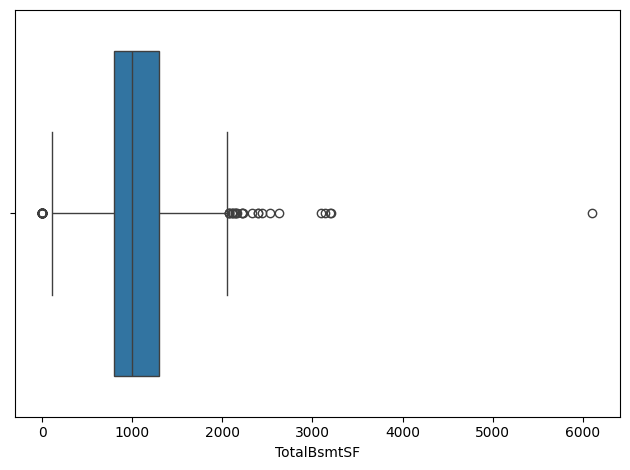

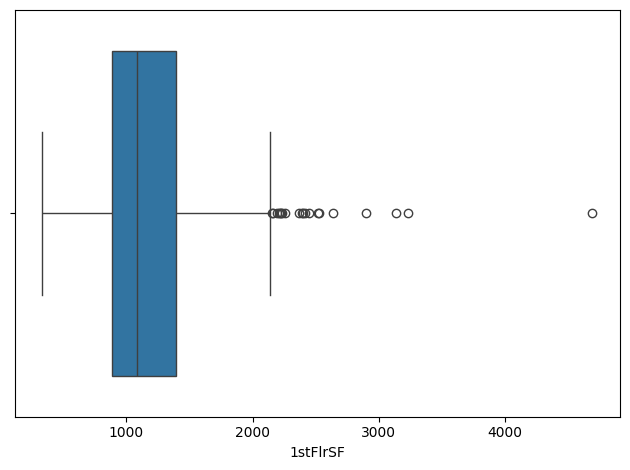

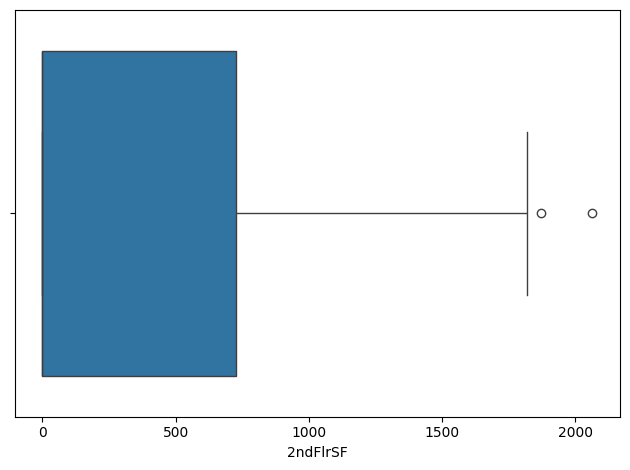

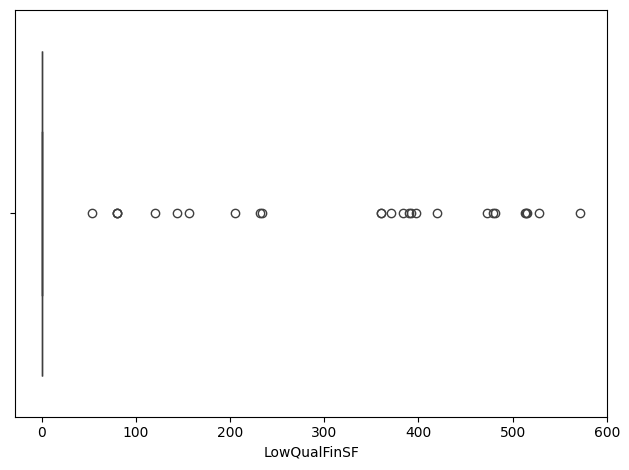

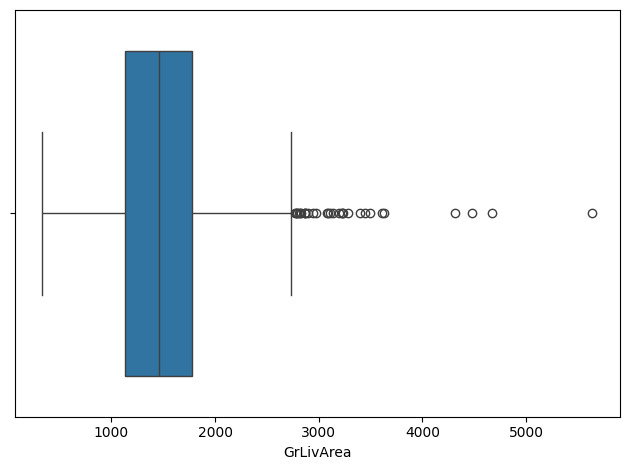

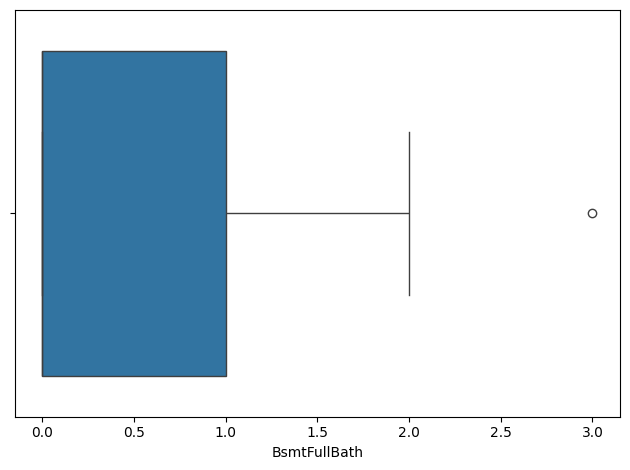

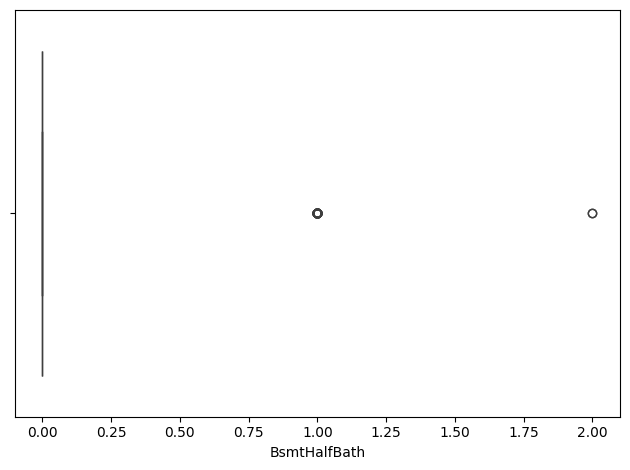

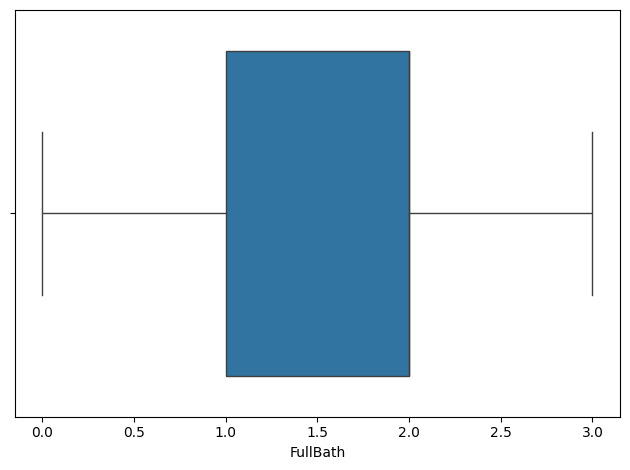

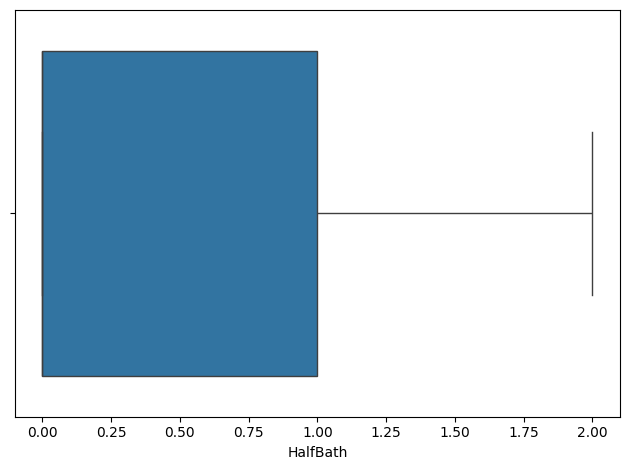

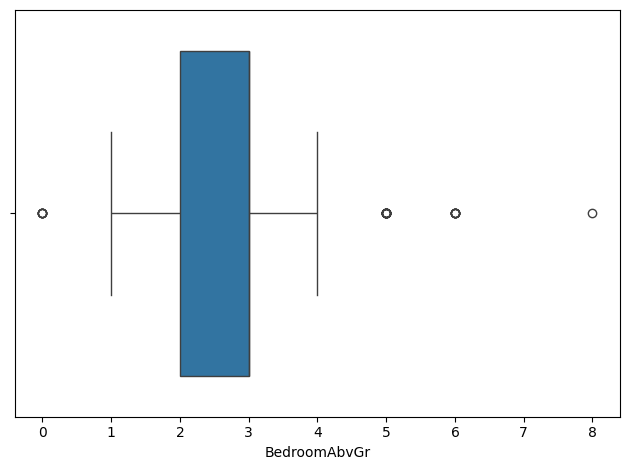

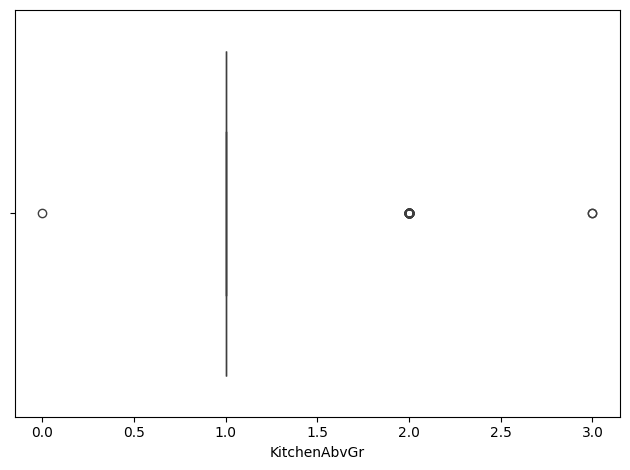

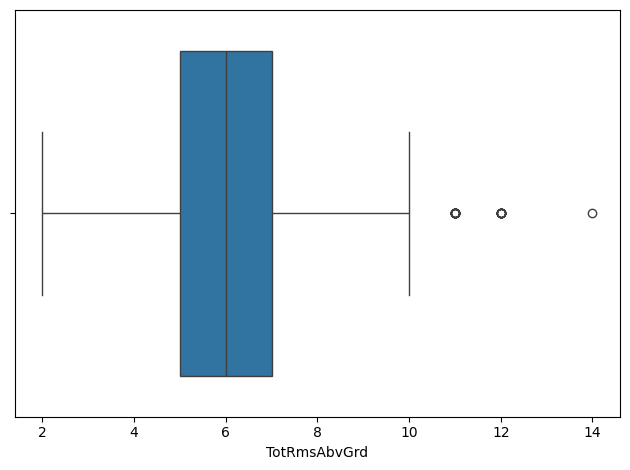

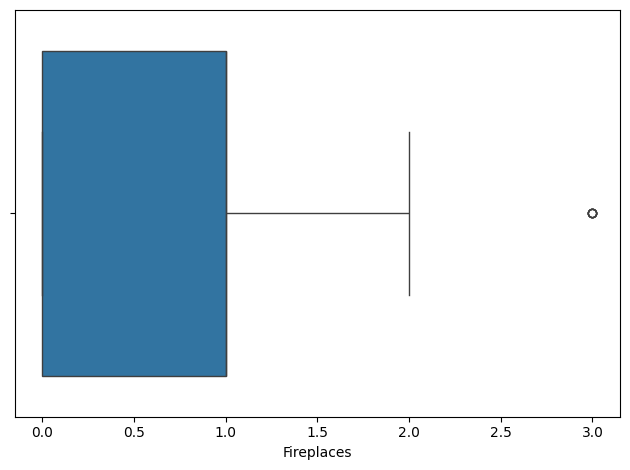

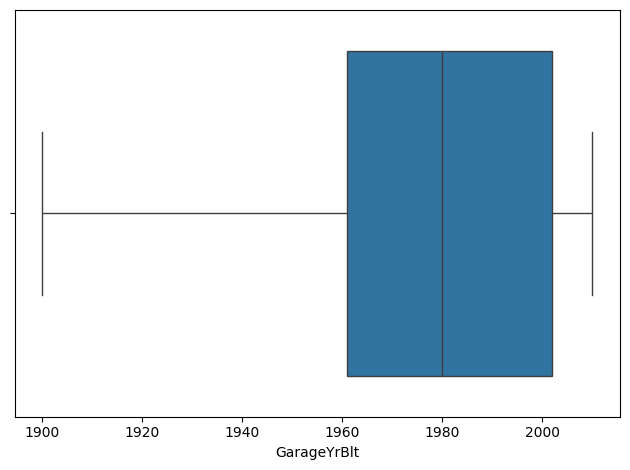

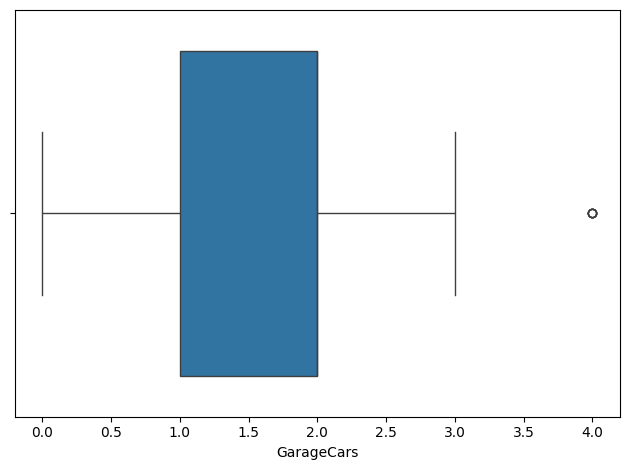

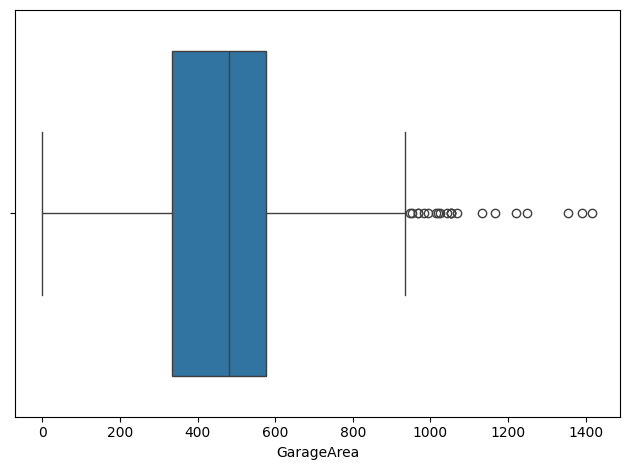

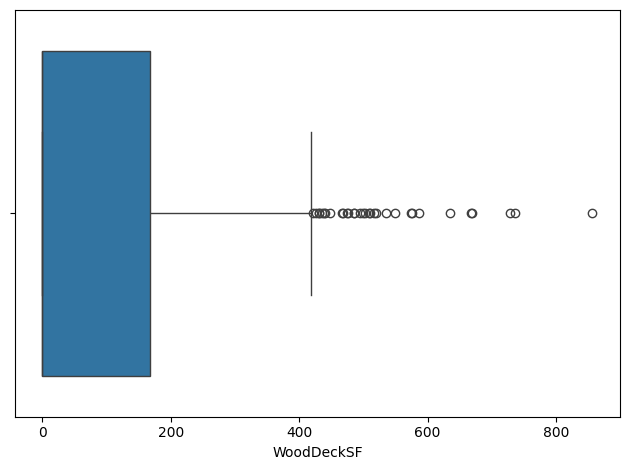

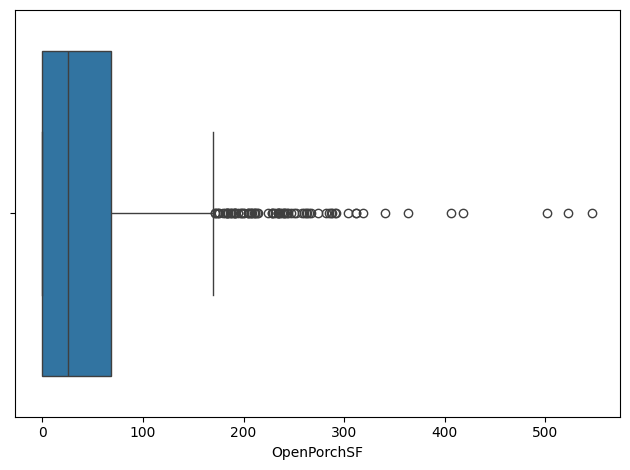

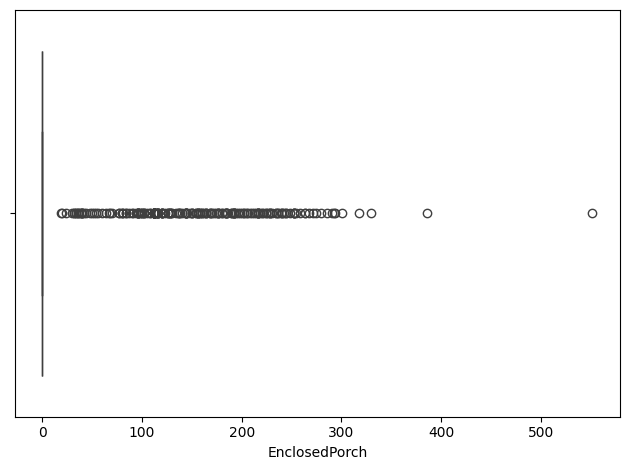

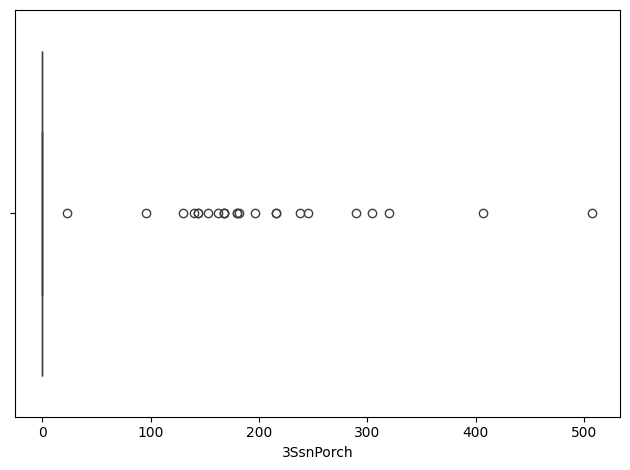

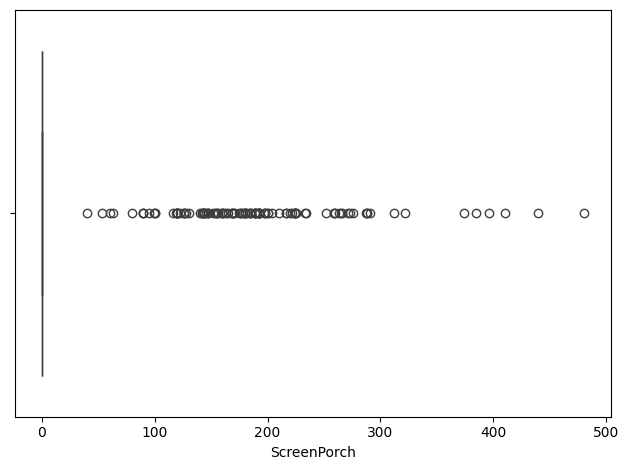

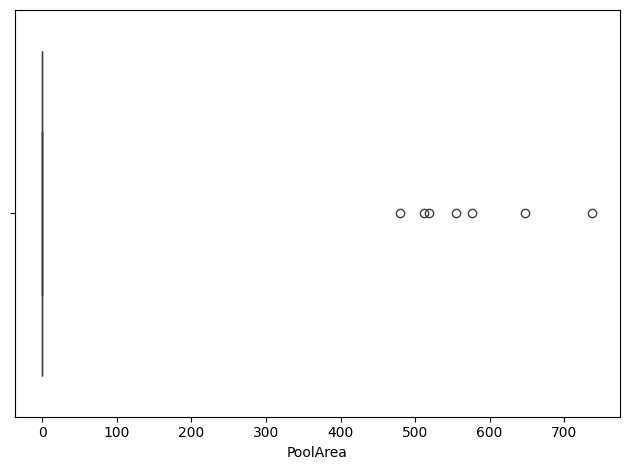

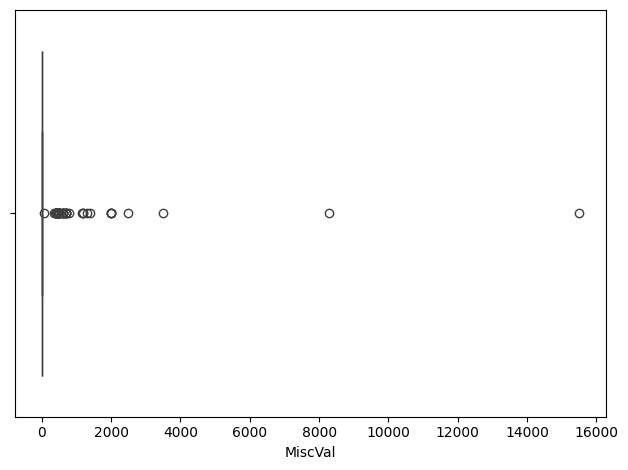

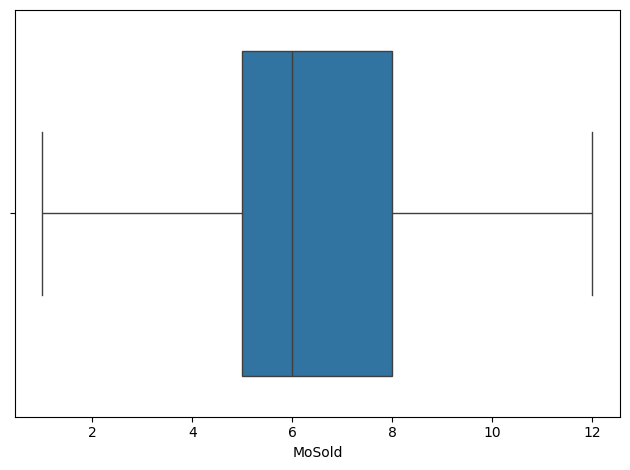

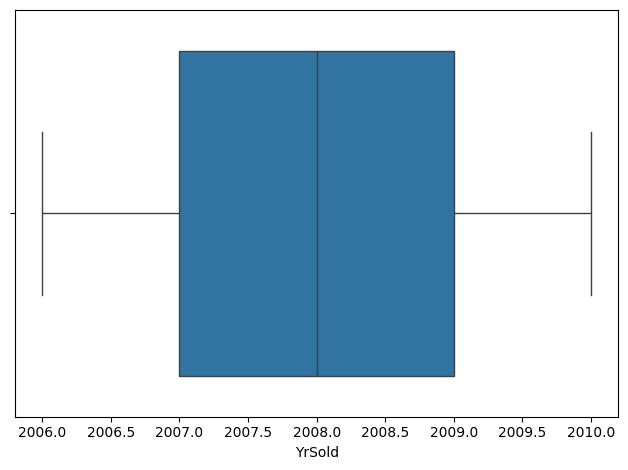

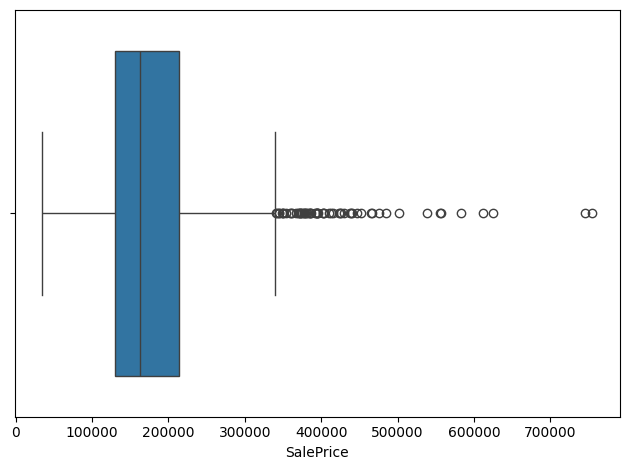

In [3359]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.boxplot(data=dataset,x=i)
  plt.tight_layout()
  plt.show()

In [3360]:
numeric_columns = dataset.select_dtypes(include = "number").columns

numeric_features = [col for col in numeric_columns if col != 'SalePrice']

print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


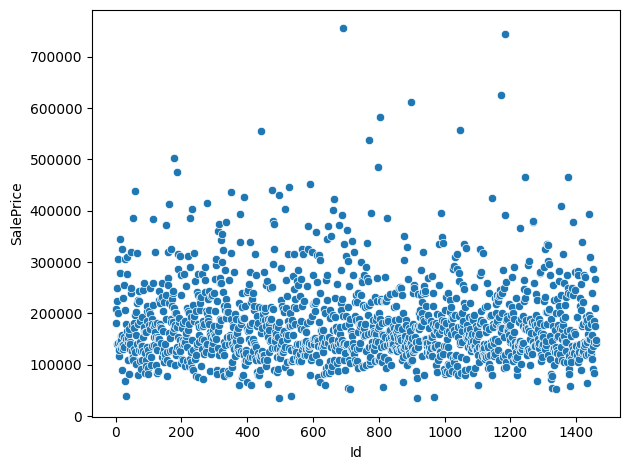

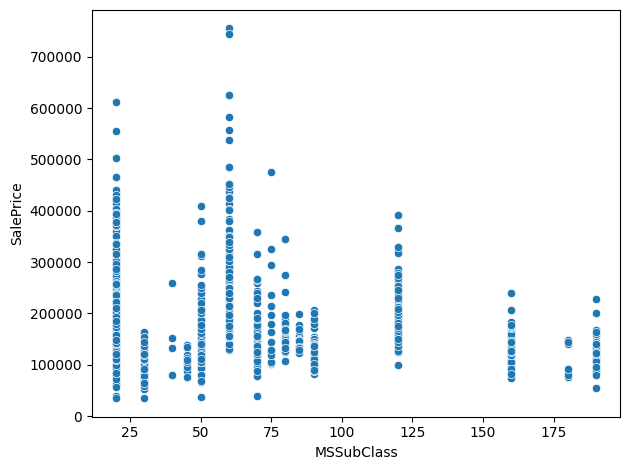

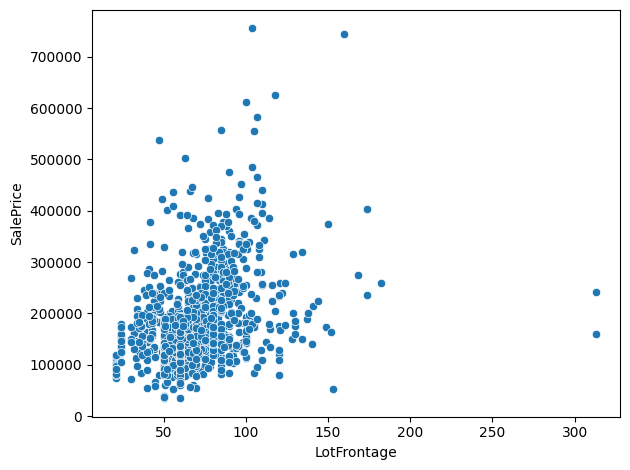

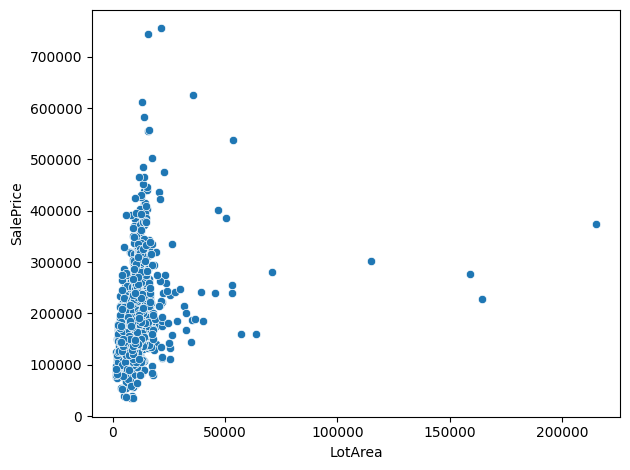

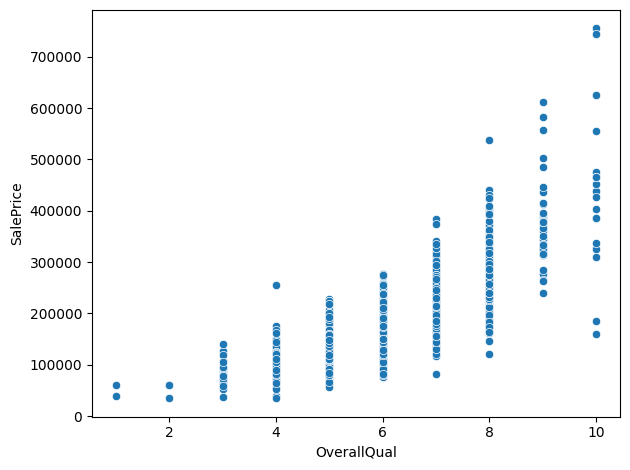

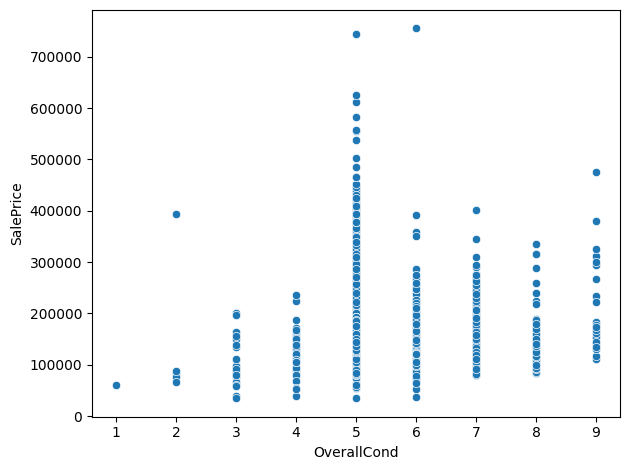

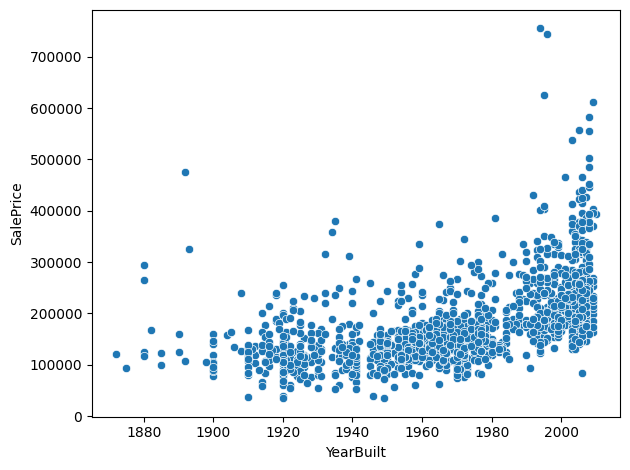

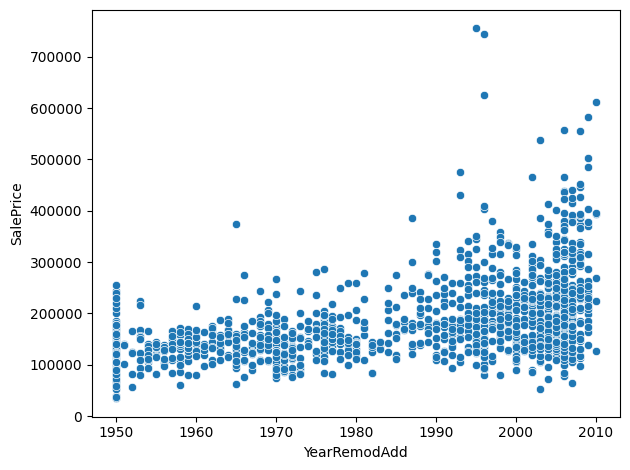

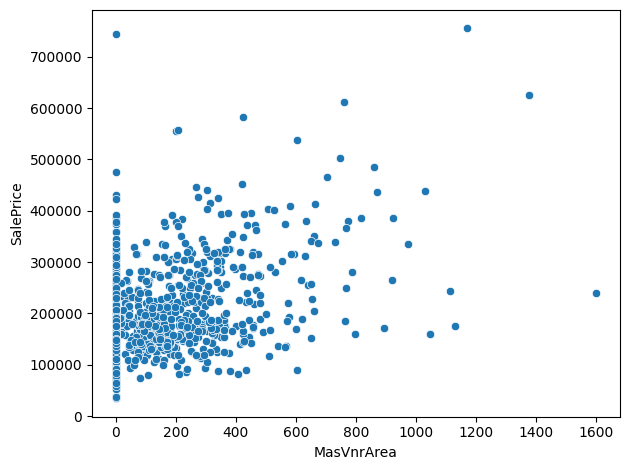

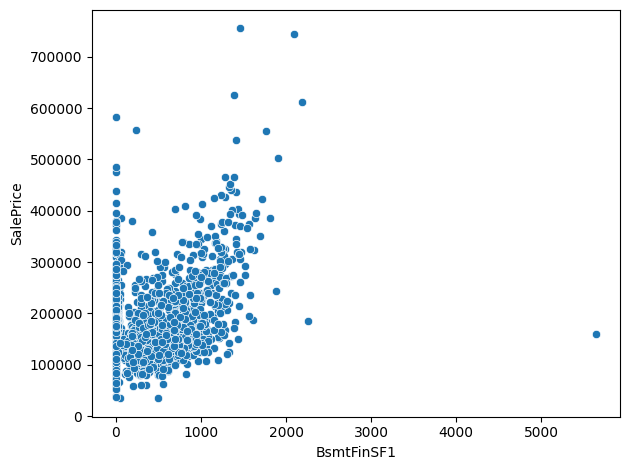

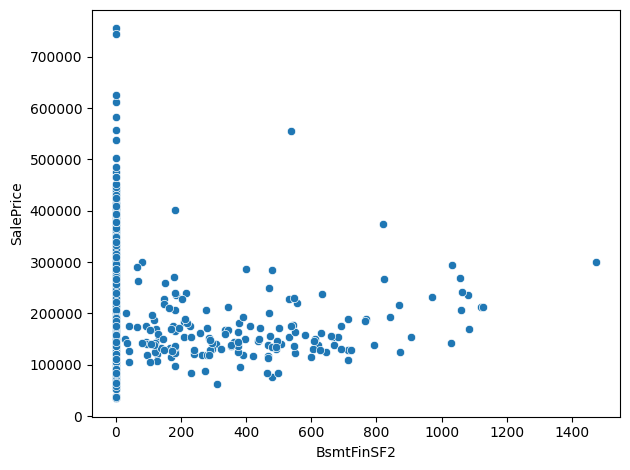

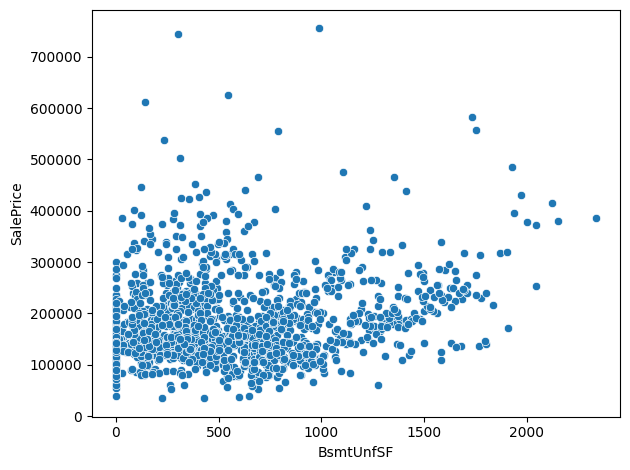

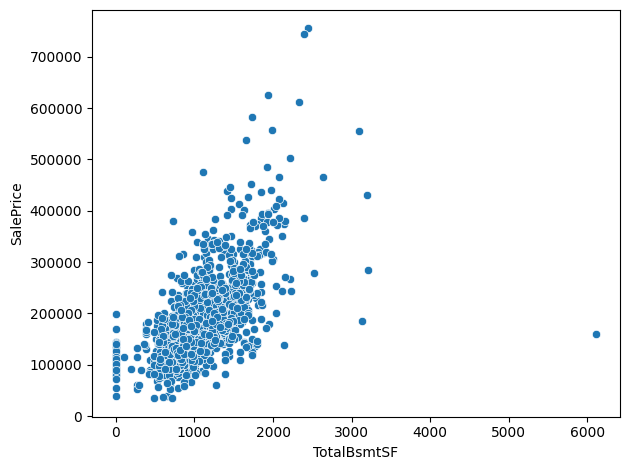

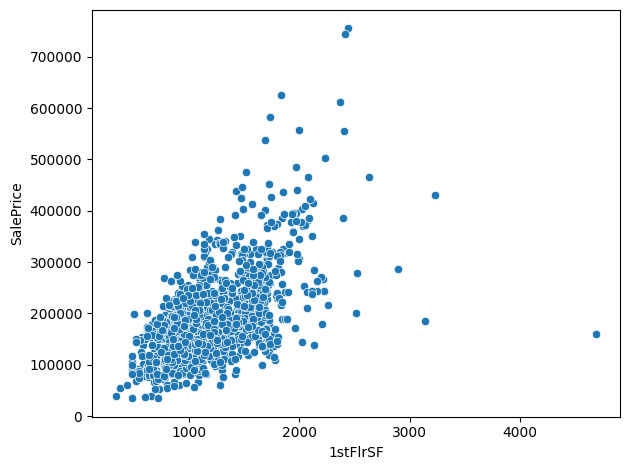

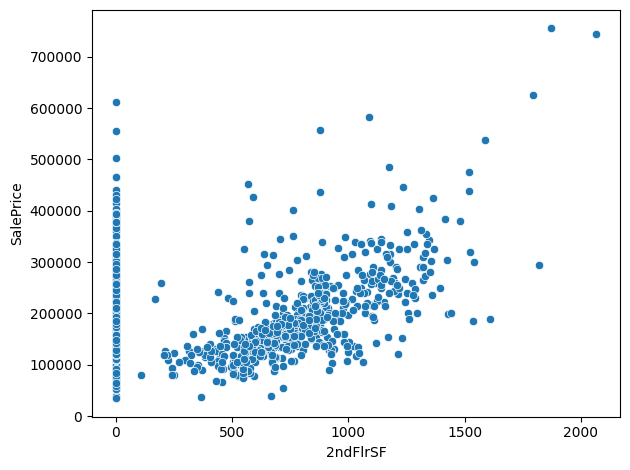

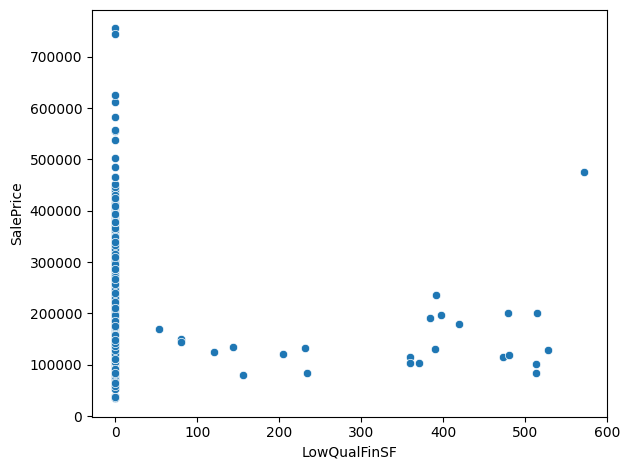

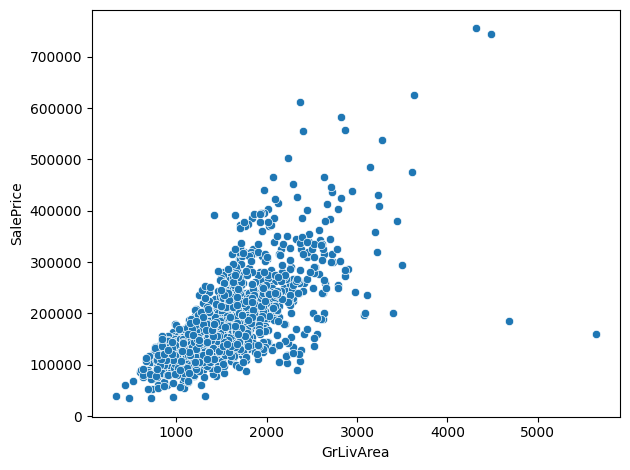

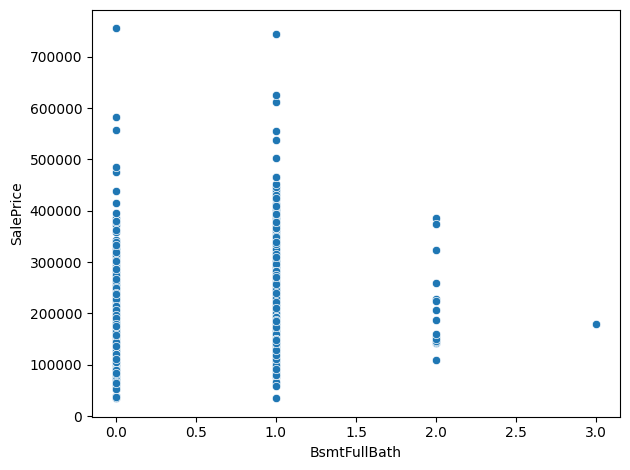

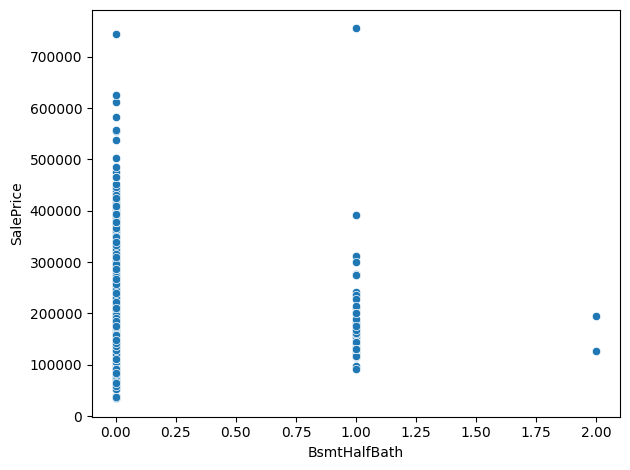

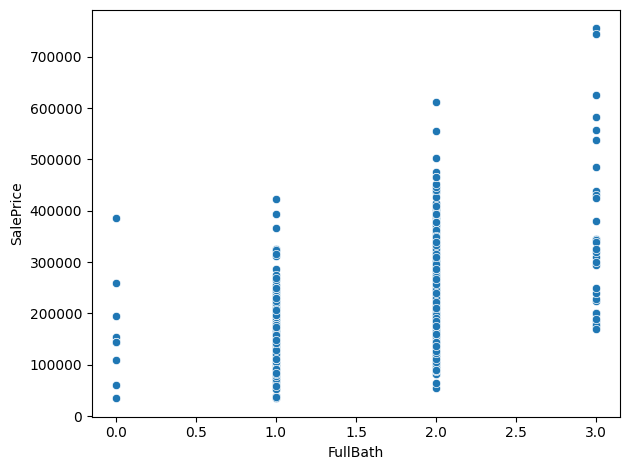

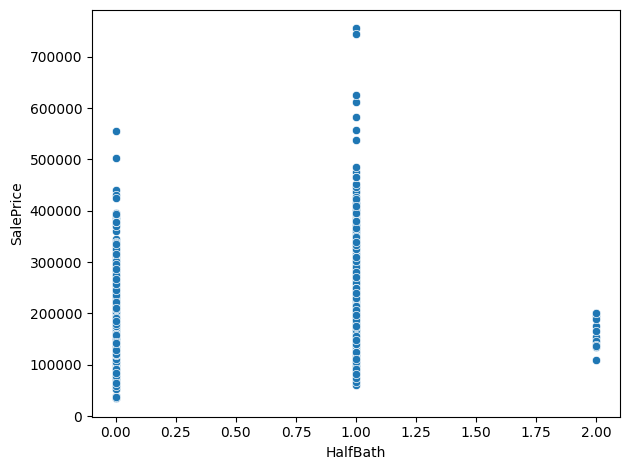

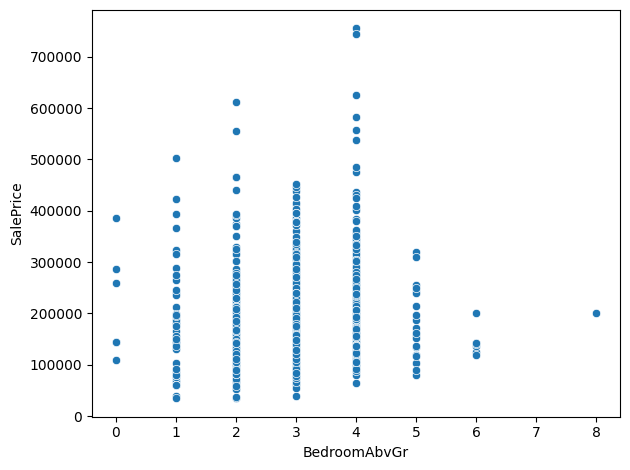

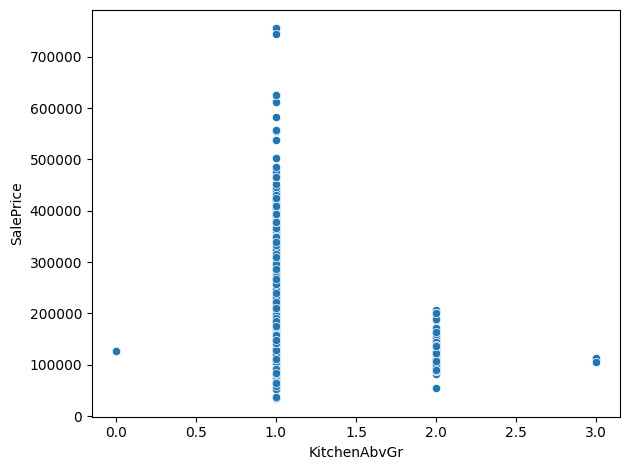

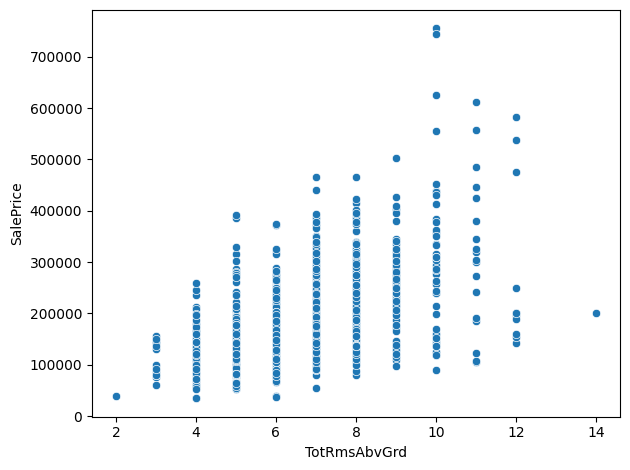

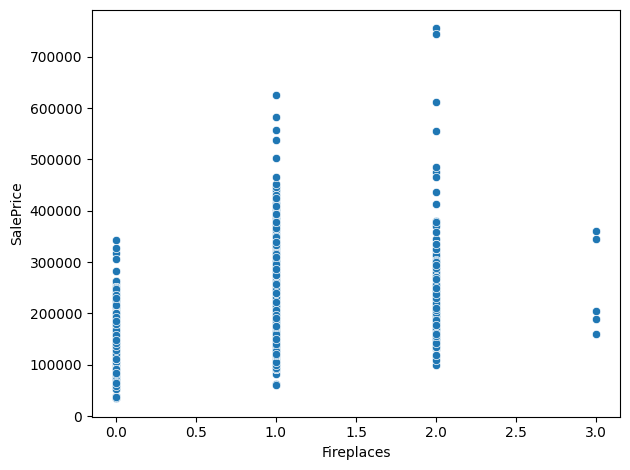

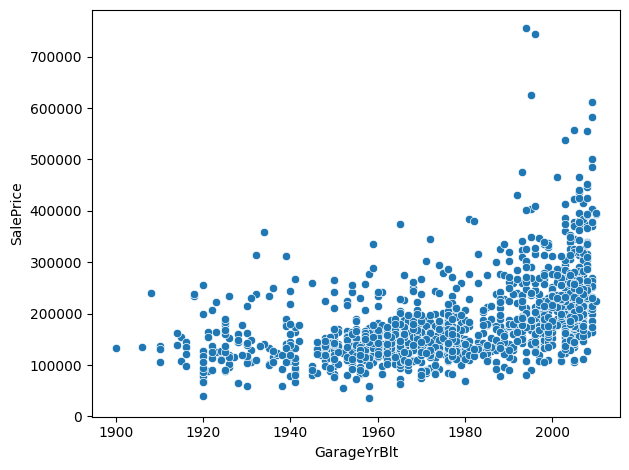

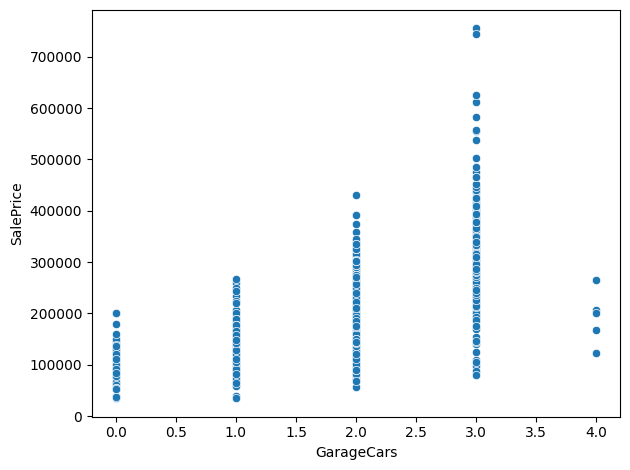

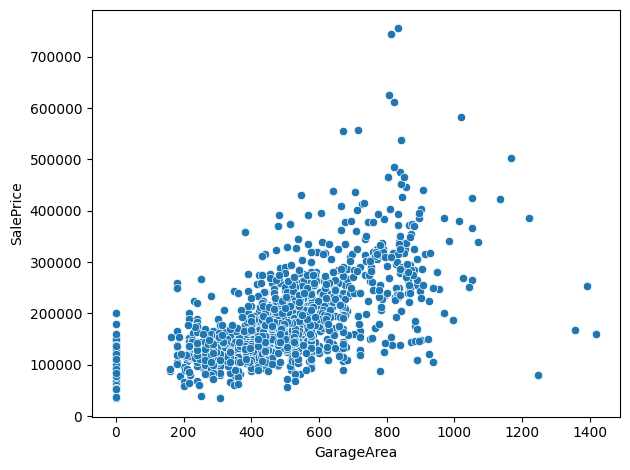

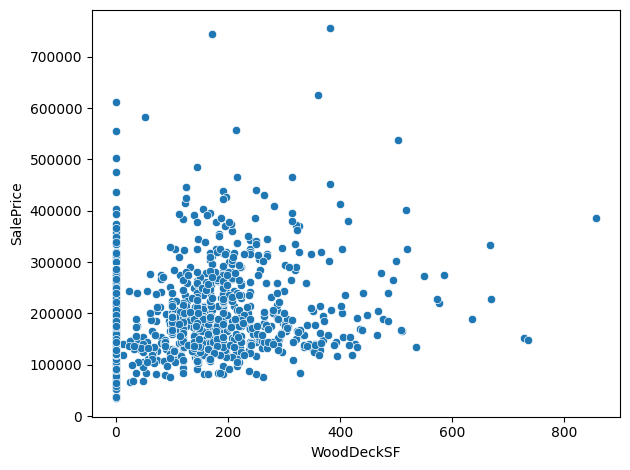

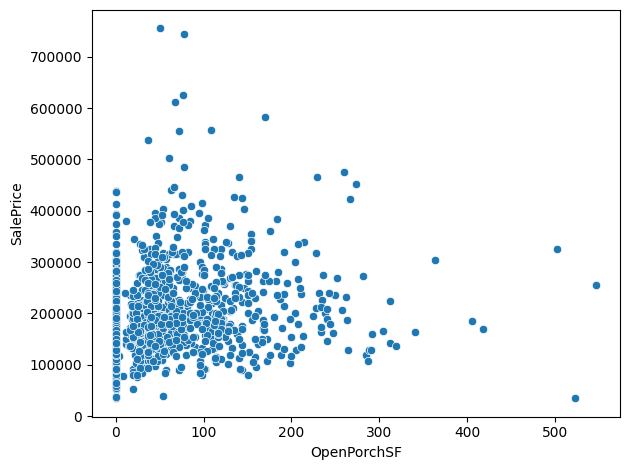

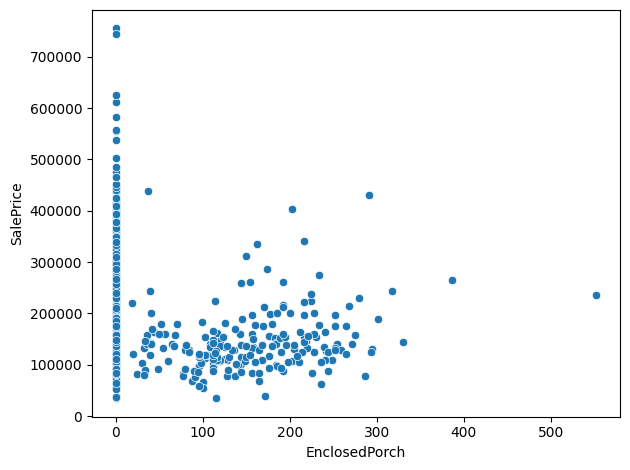

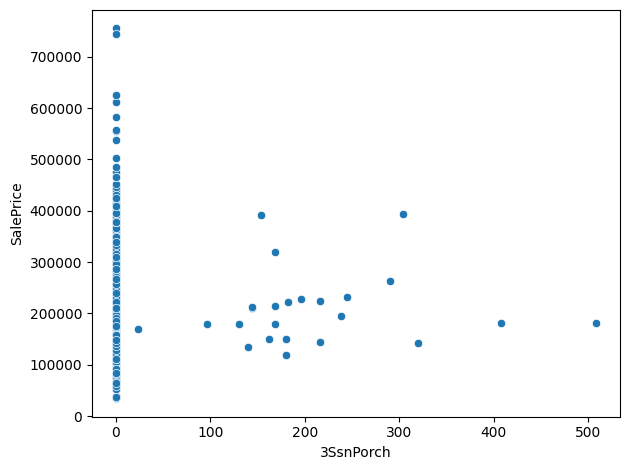

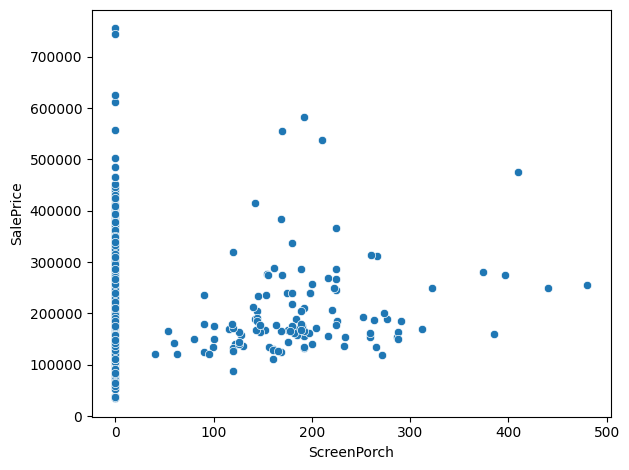

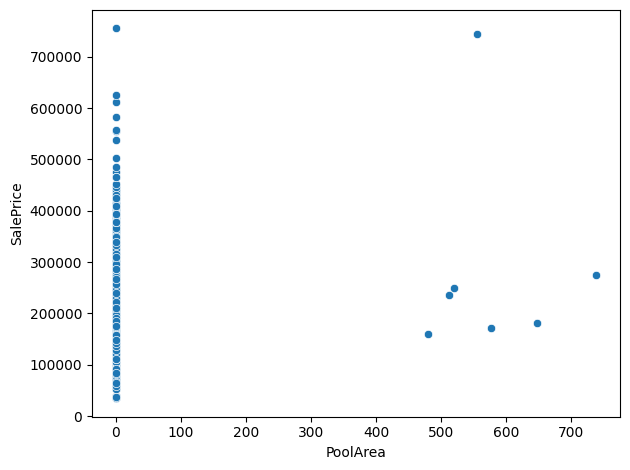

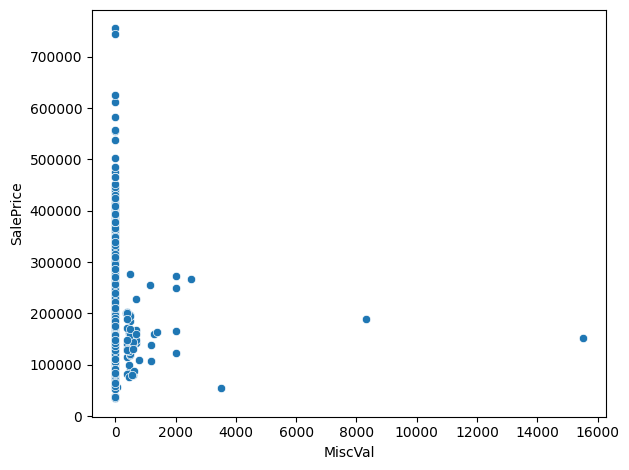

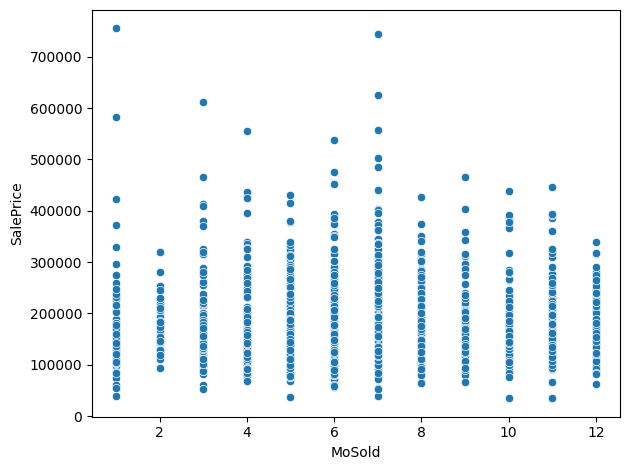

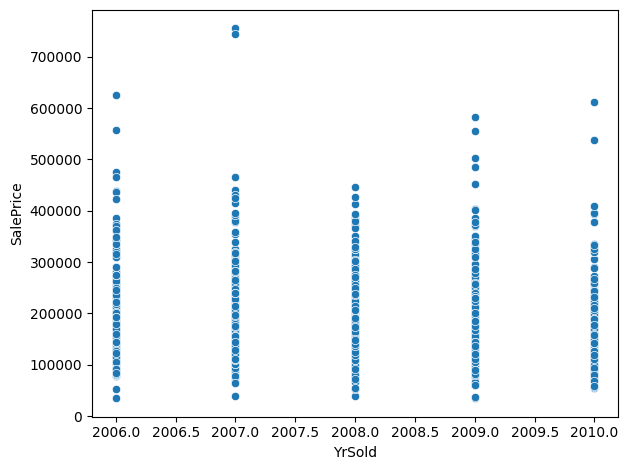

In [3361]:
for i in numeric_features:
    sns.scatterplot(data=dataset, x=i, y='SalePrice')
    plt.tight_layout()
    plt.show()

In [3362]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3363]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
Alley                   1369
MasVnrType               872
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81
PoolQC                  1453
Fence                   1179
MiscFeature             1406


In [3364]:
(missing_values/dataset.shape[0])*100

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [3365]:
threshold = 0.6

max_missing_values = int(threshold * len(dataset))
columns_to_drop = dataset.columns[dataset.isnull().sum() > max_missing_values]

In [3366]:
def drop_columns(df, columns=columns_to_drop):
    columns_to_drop = list(set(columns))

    return df.drop(columns=columns_to_drop, errors='ignore')

In [3367]:
dataset = drop_columns(dataset, columns_to_drop)

In [3368]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
MasVnrType               872
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81


In [3369]:
(missing_values/dataset.shape[0])*100

,0
LotFrontage,17.739726
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274


In [3370]:
categorical_features = dataset.select_dtypes(include=['object']).columns

In [3371]:
for feature in categorical_features:
    print(f"Unique values for {feature}:")
    print(dataset[feature].unique())
    print("\n")

Unique values for MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values for Street:
['Pave' 'Grvl']


Unique values for LotShape:
['Reg' 'IR1' 'IR2' 'IR3']


Unique values for LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']


Unique values for Utilities:
['AllPub' 'NoSeWa']


Unique values for LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values for LandSlope:
['Gtl' 'Mod' 'Sev']


Unique values for Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values for Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values for Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values for BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


Unique values for HouseStyle:
['2Story' '1Story' '1.5Fin'

In [3372]:
pd.set_option('display.max_rows', None)
unique_counts = dataset.nunique()
print(unique_counts)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [3373]:
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [3374]:
duplicate_ids = dataset[dataset.duplicated(subset=['Id'], keep=False)]
duplicate_ids.sort_values(by='Id', inplace=True)
duplicate_ids.head(6)

<ipython-input-3374-c3de3c7d040b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_ids.sort_values(by='Id', inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [3375]:
dataset = dataset.drop(columns=['Id'])

In [3376]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 

In [3377]:
missing_num = [col for col in missing_values.index if col in numerical_cols]
missing_cat = [col for col in missing_values.index if col in categorical_cols]

skewness = dataset[missing_num].skew()

print("Numerical Features with Missing Values:")
print(skewness)

Numerical Features with Missing Values:
LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64


In [3378]:
numeric_df = dataset.select_dtypes(include=['number'])
correlation = numeric_df.corr()['LotFrontage'].sort_values(ascending=False)

print(correlation)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64


In [3379]:
categorical_features = dataset.select_dtypes(include=['object']).columns
anova_results = {}

for col in categorical_features:
    unique_vals = dataset[col].nunique()
    if unique_vals > 1:
        groups = [dataset['LotFrontage'][dataset[col] == category].dropna() for category in dataset[col].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = p_value

anova_results = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}

print("ANOVA Test Results (Categorical vs. LotFrontage):")
print(anova_results)

<ipython-input-3379-9d12c44c2bd2>:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


ANOVA Test Results (Categorical vs. LotFrontage):
{'BldgType': np.float64(2.389898748978942e-72), 'Neighborhood': np.float64(1.9449880313279755e-50), 'MSZoning': np.float64(3.800293292683771e-34), 'LotShape': np.float64(4.0387740017869405e-20), 'LotConfig': np.float64(2.8888012172164797e-18), 'Condition1': np.float64(1.2601163534429517e-11), 'ExterQual': np.float64(1.1113685599979598e-10), 'Exterior2nd': np.float64(1.607832080769748e-08), 'Foundation': np.float64(7.591696057952576e-06), 'Exterior1st': np.float64(0.00021164481119448784), 'LandContour': np.float64(0.004208108752680465), 'Street': np.float64(0.15676251628598672), 'Utilities': np.float64(nan), 'LandSlope': np.float64(0.008135645706202586), 'Condition2': np.float64(nan), 'HouseStyle': np.float64(5.843202986548061e-05), 'RoofStyle': np.float64(nan), 'RoofMatl': np.float64(nan), 'MasVnrType': np.float64(nan), 'SaleCondition': np.float64(0.0005600732398946991), 'ExterCond': np.float64(0.4398144956602865), 'BsmtQual': np.float6

In [3380]:
def replace_missing_values(dataset):
  dataset['LotFrontage'] = dataset.groupby(['BldgType', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
  dataset['LotFrontage'].fillna(dataset[dataset['BldgType'] == '2fmCon']['LotFrontage'].median(), inplace=True)
  dataset['MasVnrArea'].fillna(0, inplace=True)
  dataset['MasVnrType'].fillna('No', inplace=True)

  garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
  has_garage = dataset[garage_cols].notnull().any(axis=1)

  dataset.loc[~has_garage, garage_cols] = "No"

  for col in garage_cols:
      dataset[col] = dataset.groupby('GarageType')[col].transform(lambda x: x.fillna(x.mode()[0]))

  bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
  has_basement = dataset[bsmt_cols].notnull().any(axis=1)

  dataset.loc[~has_basement, bsmt_cols] = "No"

  for col in bsmt_cols:
      dataset[col] = dataset.groupby('BsmtQual')[col].transform(lambda x: x.fillna(x.mode()[0]))

  dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

  dataset['FireplaceQu'].fillna("No", inplace=True)

  dataset.loc[dataset['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

  dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

  return dataset

In [3381]:
dataset = replace_missing_values(dataset)

<ipython-input-3380-12088edbe1d0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['LotFrontage'].fillna(dataset[dataset['BldgType'] == '2fmCon']['LotFrontage'].median(), inplace=True)
<ipython-input-3380-12088edbe1d0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [3382]:
null_lotfrontage = dataset['LotFrontage'].isnull().sum()
print(f"Number of null values in 'LotFrontage' column: {null_lotfrontage}")

Number of null values in 'LotFrontage' column: 0


In [3383]:
dataset['MasVnrArea'].fillna(0, inplace=True)
dataset['MasVnrType'].fillna('No', inplace=True)

<ipython-input-3383-4c5825a2e986>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['MasVnrArea'].fillna(0, inplace=True)
<ipython-input-3383-4c5825a2e986>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [3384]:
null_MasVnrArea = dataset['MasVnrArea'].isnull().sum()
print(f"Number of null values in 'MasVnrArea' column: {null_MasVnrArea}")

Number of null values in 'MasVnrArea' column: 0


In [3385]:
print("Categorical Features with Missing Values:")
print(missing_cat)

Categorical Features with Missing Values:
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [3386]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    print(f"{col}: {dataset[col].nunique()} unique values")
    print(dataset[col].unique(), "\n")

BsmtQual: 5 unique values
['Gd' 'TA' 'Ex' 'No' 'Fa'] 

BsmtCond: 5 unique values
['TA' 'Gd' 'No' 'Fa' 'Po'] 

BsmtExposure: 4 unique values
['No' 'Gd' 'Mn' 'Av'] 

BsmtFinType1: 7 unique values
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No' 'LwQ'] 

BsmtFinType2: 7 unique values
['Unf' 'BLQ' 'No' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Electrical: 5 unique values
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix'] 

FireplaceQu: 6 unique values
['No' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageType: 7 unique values
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No' 'Basment' '2Types'] 

GarageFinish: 4 unique values
['RFn' 'Unf' 'Fin' 'No'] 

GarageQual: 6 unique values
['TA' 'Fa' 'Gd' 'No' 'Ex' 'Po'] 

GarageCond: 6 unique values
['TA' 'Fa' 'No' 'Gd' 'Po' 'Ex'] 



In [3387]:
print("Missing LotFrontage:", dataset['LotFrontage'].isnull().sum())
print(dataset[dataset['LotFrontage'].isnull()][['Neighborhood', 'BldgType', 'LotFrontage']])

Missing LotFrontage: 0
Empty DataFrame
Columns: [Neighborhood, BldgType, LotFrontage]
Index: []


In [3388]:
dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0


In [3389]:
dataset['SalePrice'].quantile(0.995)
rows_2_drop=dataset[dataset['SalePrice']>dataset['SalePrice'].quantile(0.995)].index
dataset.drop(rows_2_drop,inplace=True)

In [3390]:
rows_2_drop=dataset[dataset['GrLivArea']>4000].index
dataset.drop(rows_2_drop,inplace=True)

In [3391]:
rows_2_drop=dataset[dataset['LotArea']>100000].index
dataset.drop(rows_2_drop,inplace=True)

In [3392]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1446 non-null   int64  
 1   MSZoning       1446 non-null   object 
 2   LotFrontage    1446 non-null   float64
 3   LotArea        1446 non-null   int64  
 4   Street         1446 non-null   object 
 5   LotShape       1446 non-null   object 
 6   LandContour    1446 non-null   object 
 7   Utilities      1446 non-null   object 
 8   LotConfig      1446 non-null   object 
 9   LandSlope      1446 non-null   object 
 10  Neighborhood   1446 non-null   object 
 11  Condition1     1446 non-null   object 
 12  Condition2     1446 non-null   object 
 13  BldgType       1446 non-null   object 
 14  HouseStyle     1446 non-null   object 
 15  OverallQual    1446 non-null   int64  
 16  OverallCond    1446 non-null   int64  
 17  YearBuilt      1446 non-null   int64  
 18  YearRemodAdd 

In [3393]:
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [3394]:
#dataset.to_csv("/content/drive/My Drive/Machine Learning/cleaned_dataset.csv", index=False)

## Feature Engineering

In [3395]:
# dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/cleaned_dataset.csv')

In [3396]:
def check_non_finite(dataset):
    non_finite_counts = (dataset.isna().sum() + (dataset == np.inf).sum() + (dataset == -np.inf).sum())
    print("Non-finite values in each column:")
    print(non_finite_counts[non_finite_counts > 0])
    dataset.info()
    return dataset

In [3397]:
def replace_non_finite(dataset):
    dataset = dataset.replace([np.inf, -np.inf], np.nan)  # Convert inf/-inf to NaN first
    dataset = dataset.fillna(0)  # Replace NaN with 0
    non_finite_counts = (dataset.isna().sum() + (dataset == np.inf).sum() + (dataset == -np.inf).sum())
    print("Non-finite values in each column:")
    print(non_finite_counts[non_finite_counts > 0])
    return dataset

In [3398]:
def check_duplicates(dataset):
    duplicate_count = dataset.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return dataset

In [3399]:
def display_null_counts(dataset):
    print("Number of null values per column:")
    print(dataset.isnull().sum())
    return dataset


### Creating new features

In [3400]:
def create_features(dataset):
    dataset['TotalBath'] = dataset['FullBath'] + 0.5 * dataset['HalfBath'] + dataset['BsmtFullBath'] + 0.5 * dataset['BsmtHalfBath']
    dataset['TotalPorchSF'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
    dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['IsRemodeled'] = (dataset['YearBuilt'] != dataset['YearRemodAdd']).astype(int)
    dataset["TotalSqFt"] = dataset["GrLivArea"] + dataset["TotalBsmtSF"] + dataset["GarageArea"]
    dataset["HasGarage"] = (dataset["GarageArea"] > 0).astype(int)
    dataset["QualitySize"] = dataset["OverallQual"] * dataset["GrLivArea"]
    return dataset

### Mapping Features

In [3401]:
# nbhd_map should be initialized externally if not already set
try:
    nbhd_map
except NameError:
    nbhd_map = None

def map_features(dataset):
    bsmt_fin_type_map = {'No': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

    for col in ["BsmtFinType1", "BsmtFinType2"]:
        if col in dataset.columns:
            dataset[col] = dataset[col].map(bsmt_fin_type_map)

    if all(col in dataset.columns for col in ["BsmtFinSF1", "BsmtFinType1", "BsmtFinSF2", "BsmtFinType2"]):
        dataset['TotalBsmtFinScore'] = (
            dataset['BsmtFinSF1'] * dataset['BsmtFinType1'] +
            dataset['BsmtFinSF2'] * dataset['BsmtFinType2']
        )

    if all(col in dataset.columns for col in ["BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF"]):
        dataset['BsmtFinRatio'] = (
            (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2']) / dataset['TotalBsmtSF']
        ).fillna(0)

    if 'Neighborhood' in dataset.columns:
        global nbhd_map
        if 'SalePrice' in dataset.columns and nbhd_map is None:
            nbhd_map = dataset.groupby("Neighborhood")['SalePrice'].median().to_dict()
            dataset["Neighborhood"] = dataset["Neighborhood"].map(nbhd_map)
        if nbhd_map:
            if nbhd_map:
                dataset["Neighborhood"] = dataset["Neighborhood"].map(nbhd_map).fillna(0)
            else:
                dataset["Neighborhood"] = dataset["Neighborhood"].astype(str).astype('category').cat.codes

        if 'OverallQual' in dataset.columns:
            dataset["NeighborhoodQuality"] = dataset["Neighborhood"] * dataset["OverallQual"]

    quality_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, 'No': 0}
    for col in ["ExterQual", "KitchenQual", "HeatingQC"]:
        if col in dataset.columns:
            dataset[col + "_ordinal"] = dataset[col].map(quality_map)

    return dataset

### Drop features

In [3402]:
def drop_features(dataset):
    dataset = dataset.drop(['Street'], axis=1)
    columns_to_drop = ['GarageYrBlt', 'GarageCond', 'BsmtFinType2',
       'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
        'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath',
        'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF',
        'GarageArea','GrLivArea']
    dataset = dataset.drop(columns=columns_to_drop)
    return dataset

In [3403]:
zero_count = (dataset['TotalBsmtSF'] == 0).sum()
print("Number of zero values in 'TotalBsmtSF':", zero_count)

Number of zero values in 'TotalBsmtSF': 37


In [3404]:
dataset['BsmtFinSF2'].unique()

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175, 1474,  264,  479,  232,  380,  544,  294,  258,  121,  391,
        531,  344,  713,  210,  311, 1120,  165,  532,   96,  495,  174,
       1127,  139,  202,  645,  123,  551,  219,  606,  147,  612,  480,
        182,  132,  336,  468,  287,   35,  499,  723,  119,   40,  117,
        239,   80,  472,   64, 1057,  127,  630,  128,  377,  764,  345,
        539, 1085,  435,  823,  500,  290,  324,  634,  411,  841, 1061,
        466,  396,  354,  149,  193,  273,  465,  400,  682,  557,  230,
        106,  791,  240,  547,  469,  177,  108,  600,  492,  211,  168,
       1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,  173,
        972,  105,  420,  546,  334,  352,  872,  110,  627,  163, 1029])

### Encoding Categorical Columns

In [3405]:
def encode_categorical(dataset):
    nominal_cols = [
        'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
        'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition', 'MasVnrType'
    ]
    dataset = pd.get_dummies(dataset, columns=nominal_cols, drop_first=True)

    ordinal_cols = [
        'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
        'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive','KitchenQual','ExterQual'
    ]

    ordinal_mappings = {
        'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No': 0},
        'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
        'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No': 0},
        'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}
    }

    for col in ordinal_cols:
        if col in dataset.columns:
            dataset[col] = dataset[col].map(ordinal_mappings[col])

    bool_cols = dataset.select_dtypes(include=['bool']).columns
    dataset[bool_cols] = dataset[bool_cols].astype(int)

    return dataset

### Feature Scaling

In [3406]:
scaler = RobustScaler()

In [3407]:
def scale_features(dataset):
    numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
    if 'SalePrice' in numerical_cols:
      numerical_cols = numerical_cols.drop('SalePrice')
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
    return dataset

### Saving the scaled dataset to csv file

In [3408]:
# def save_to_csv(dataset, filename="/content/drive/My Drive/Machine Learning/scaled_dataset.csv"):
#     dataset.to_csv(filename, index=False)
#     print(f"Dataset saved to {filename}")

###Run Pipeline


In [3409]:
def run_pipeline(dataset):
    dataset = check_non_finite(dataset)
    dataset = replace_non_finite(dataset)
    dataset = check_duplicates(dataset)
    dataset = display_null_counts(dataset)
    dataset = create_features(dataset)
    dataset = map_features(dataset)
    dataset = drop_features(dataset)
    dataset = encode_categorical(dataset)
    dataset = scale_features(dataset)
    #dataset.to_csv("scaled_dataset.csv", index=False)
    return dataset

In [3410]:
dataset = run_pipeline(dataset)

Non-finite values in each column:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1446 non-null   int64  
 1   MSZoning       1446 non-null   object 
 2   LotFrontage    1446 non-null   float64
 3   LotArea        1446 non-null   int64  
 4   Street         1446 non-null   object 
 5   LotShape       1446 non-null   object 
 6   LandContour    1446 non-null   object 
 7   Utilities      1446 non-null   object 
 8   LotConfig      1446 non-null   object 
 9   LandSlope      1446 non-null   object 
 10  Neighborhood   1446 non-null   object 
 11  Condition1     1446 non-null   object 
 12  Condition2     1446 non-null   object 
 13  BldgType       1446 non-null   object 
 14  HouseStyle     1446 non-null   object 
 15  OverallQual    1446 non-null   int64  
 16  OverallCond    1446 non-null   int64  
 17

In [3411]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Columns: 171 entries, MSSubClass to MasVnrType_Stone
dtypes: float64(170), int64(1)
memory usage: 1.9 MB


In [3412]:
print(dataset.head())

   MSSubClass  LotFrontage   LotArea  Neighborhood  OverallQual  OverallCond  \
0         0.2        -0.30 -0.247533      0.490354          0.5          0.0   
1        -0.6         0.45  0.041612      0.824759          0.0          3.0   
2         0.2        -0.15  0.456471      0.490354          0.5          0.0   
3         0.4        -0.55  0.029040      0.545402          0.5          0.0   
4         0.2         0.65  1.213276      2.167203          1.0          0.0   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_Oth  SaleType_WD  \
0      1.2250        1.0        0.0       0.0  ...           0.0          0.0   
1      0.0000        0.0        0.0       0.0  ...           0.0          0.0   
2      1.0125        1.0        0.0       0.0  ...           0.0          0.0   
3      0.0000        0.0        0.0      -1.0  ...           0.0          0.0   
4      2.1875        1.0        0.0       0.0  ...           0.0          0.0   

   SaleCondition_AdjLand  SaleCo

## Feature Selection

### 1.PCA/LDA + Recursive Feature Elimination
PCA is used to reduce the dimensionality of the dataset while retaining most of the variance in the data. Recursive Feature Elimination (RFE) to select the most important features. (wrapper method)

In [3413]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Load the dataset
# # data = pd.read_csv('/content/drive/MyDrive/Machine Learning/scaled_dataset.csv')

# # Separate features and target
# X = dataset.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
# y = dataset['SalePrice']  # Target variable

# # Step 1: Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# X_pca = pca.fit_transform(X)  # Apply PCA to the already scaled data

# print(f"Original number of features: {X.shape[1]}")
# print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# # Step 2: Apply Recursive Feature Elimination (RFE)
# model = LinearRegression()  # Initialize Linear Regression model
# rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
# X_rfe = rfe.fit_transform(X_pca, y)  # Fit RFE and transform the PCA-transformed data

# # Get the selected features
# selected_features = rfe.support_  # Boolean mask of selected features
# print(f"Selected features mask: {selected_features}")

# # Step 3: Train and evaluate the model
# X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)  # Train the Linear Regression model
# y_pred = model.predict(X_test)  # Make predictions

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

### 2. Hybrid Mutual Information and Genetic Algorithm Feature Selection.
Mutual Information is a filter-based feature selection technique.
It evaluates the relevance of features independently of the model and ranks them based on their statistical relationship with the target variable.
Genetic Algorithms are wrapper-based feature selection techniques.
They evaluate feature subsets by training a model and measuring its performance ( MSE).

In [3414]:
# # Step 1: Generate a synthetic dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Calculate Mutual Information
# mi_scores = mutual_info_regression(X_train, y_train)
# mi_scores /= np.max(mi_scores)  # Normalize MI scores

# # Step 3: Define the Genetic Algorithm
# # Fitness function to minimize MSE
# def evaluate_feature_subset(individual):
#     selected_features = [i for i, val in enumerate(individual) if val == 1]
#     if not selected_features:
#         return (1e6,)  # Penalize empty feature subsets
#     X_train_subset = X_train[:, selected_features]
#     X_test_subset = X_test[:, selected_features]
#     model = LinearRegression()
#     model.fit(X_train_subset, y_train)
#     y_pred = model.predict(X_test_subset)
#     mse = mean_squared_error(y_test, y_pred)
#     return (mse,)

# # Genetic Algorithm setup
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMin)

# toolbox = base.Toolbox()
# toolbox.register("attr_bool", random.randint, 0, 1)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# toolbox.register("evaluate", evaluate_feature_subset)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# toolbox.register("select", tools.selTournament, tournsize=3)

# # Adaptive parameters
# def adaptive_parameters(population):
#     for ind in population:
#         if random.random() < 0.1:  # 10% chance to adapt
#             ind.mutation_rate = min(max(ind.mutation_rate + random.uniform(-0.1, 0.1)), 0.01, 0.5)
#         else:
#             ind.mutation_rate = 0.05  # Default mutation rate

# # Step 4: Run the Genetic Algorithm
# population = toolbox.population(n=50)
# hof = tools.HallOfFame(1)
# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("min", np.min)

# population, logbook = algorithms.eaSimple(
#     population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True
# )

# # Step 5: Get the best feature subset
# best_individual = hof[0]
# selected_features = [i for i, val in enumerate(best_individual) if val == 1]
# feature_names = dataset.columns.tolist()  # Get feature names from DataFrame
# selected_feature_names = np.array(feature_names)[selected_features]
# print(selected_feature_names)
# print(f"Selected Features: {selected_features}")

# # Step 6: Train and evaluate the model with the selected features
# X_train_subset = X_train[:, selected_features]
# X_test_subset = X_test[:, selected_features]
# model = LinearRegression()
# model.fit(X_train_subset, y_train)
# y_pred = model.predict(X_test_subset)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse}")

### 3. Filter method + wrapper method + embdedd method
**Filter method (Mutual Information)** Selects features based on their statistical relationship with the target variable. Reduces the feature set to the top 40 features based on mutual information scores. <br><br>
**Wrapper Method (Recursive Feature Elimination - RFE) ** Selects features by recursively eliminating the least important features based on a model's performance, Reduces the feature set to the top 20 features based on recursive elimination. <br><br>
**Embedded Method (Lasso Regression)** Uses Lasso regression to select features by penalizing less important features (shrinking their coefficients to zero). Further reduces the feature set to the most important features identified by Lasso.

In [3415]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
for feature in categorical_cols:
    print(f"Unique values for {feature}:")
    print(dataset[feature].unique())
    print("\n")

In [3416]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
# dataset_path = '/content/drive/MyDrive/Machine Learning/scaled_dataset.csv'
# df = pd.read_csv(dataset_path)

X = dataset.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = dataset['SalePrice']  # Target variable

# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- STEP 1: FILTER METHOD (Mutual Information) ----
k = 40  # Select top k features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Filter Selected Features:", selected_features.tolist())

# Calculate MSE after Filter Method
filter_model = LinearRegression()
filter_model.fit(X_train_val_selected, y_train_val)
y_pred_filter = filter_model.predict(X_test_selected)
mse_filter = mean_squared_error(y_test, y_pred_filter)
print(f"MSE after Filter Method: {mse_filter:.4f}")

# ---- STEP 2: WRAPPER METHOD (Recursive Feature Elimination) ----
base_model = LinearRegression()
rfe = RFE(base_model, n_features_to_select=30)
X_train_val_selected = rfe.fit_transform(X_train_val_selected, y_train_val)
X_test_selected = rfe.transform(X_test_selected)

# Get the names of the selected features from the Wrapper Method
selected_features_wrapper = selected_features[rfe.support_]
print("Wrapper Selected Features:", selected_features_wrapper.tolist())

# Calculate MSE after Wrapper Method
wrapper_model = LinearRegression()
wrapper_model.fit(X_train_val_selected, y_train_val)
y_pred_wrapper = wrapper_model.predict(X_test_selected)
mse_wrapper = mean_squared_error(y_test, y_pred_wrapper)
print(f"MSE after Wrapper Method: {mse_wrapper:.4f}")

# ---- STEP 3: EMBEDDED METHOD (Lasso Regression for Feature Selection) ----
def lasso_feature_selection(X_train, y_train, min_features=30):
    alpha = 0.001  # Start with a small alpha
    while True:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)

        important_features = np.where(lasso.coef_ != 0)[0]
        if len(important_features) >= min_features:
            break  # Stop when we have at least `min_features`
        alpha *= 0.5  # Reduce alpha to be less aggressive in feature elimination

    return X_train[:, important_features], important_features

# Apply Lasso feature selection
X_train_val_selected, selected_feature_indices = lasso_feature_selection(X_train_val_selected, y_train_val, min_features=20)
X_test_selected = X_test_selected[:, selected_feature_indices]

# Get the names of the final selected features
selected_features_final1 = selected_features_wrapper[selected_feature_indices]
print("Embedded Selected Features:", selected_features_final1.tolist())

# Calculate MSE after Embedded Method
embedded_model = LinearRegression()
embedded_model.fit(X_train_val_selected, y_train_val)
y_pred_embedded = embedded_model.predict(X_test_selected)
mse_embedded = mean_squared_error(y_test, y_pred_embedded)
print(f"MSE after Embedded Method: {mse_embedded:.4f}")

# Final Selected Feature Count
print("Final Selected Feature Count:", len(selected_feature_indices))

Filter Selected Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'TotalBath', 'TotalPorchSF', 'HouseAge', 'TotalSqFt', 'QualitySize', 'TotalBsmtFinScore', 'NeighborhoodQuality', 'ExterQual_ordinal', 'KitchenQual_ordinal', 'HeatingQC_ordinal', 'MSZoning_RM', 'LotShape_Reg', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_New', 'MasVnrType_No']
MSE after Filter Method: 382581581.1698
Wrapper Selected Features: ['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'BedroomAbvGr', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'TotalPorchSF', 'HouseAge', 'TotalSqFt'

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e+11, tolerance: 5.440e+08
  model = cd_fast.enet_coordinate_descent(


## Saving feature selection pipeline (method with the lowest MSE) to drive

## Model Training and visuzalization

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.868e+10, tolerance: 4.846e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.839e+10, tolerance: 4.911e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e+10, tolerance: 4.891e


Model Performance on Validation Set (K-Fold CV):
Linear Regression:
  MAE: 15134.6146
  MSE: 458869201.9522
  RMSE: 21228.2211
  R2 Score: 0.9124

Polynomial Regression (Degree=2):
  MAE: 28506.4281
  MSE: 29487121258.6032
  RMSE: 86909.3434
  R2 Score: -3.3821

Ridge Regression:
  MAE: 15114.9367
  MSE: 458508384.0732
  RMSE: 21223.0567
  R2 Score: 0.9125

Lasso Regression:
  MAE: 15133.0411
  MSE: 458848544.4949
  RMSE: 21227.8723
  R2 Score: 0.9124

Best Model Before Tuning: Ridge Regression


Model Performance After Tuning:
Ridge Regression (Training Set):
  MAE: 14573.7271
  MSE: 423043929.1012
  RMSE: 20568.0317
  R2 Score: 0.9213

Ridge Regression (Test Set):
  MAE: 13731.1705
  MSE: 378783964.1613
  RMSE: 19462.3730
  R2 Score: 0.9211

Best Parameters: {'alpha': np.float64(0.3593813663804626)}


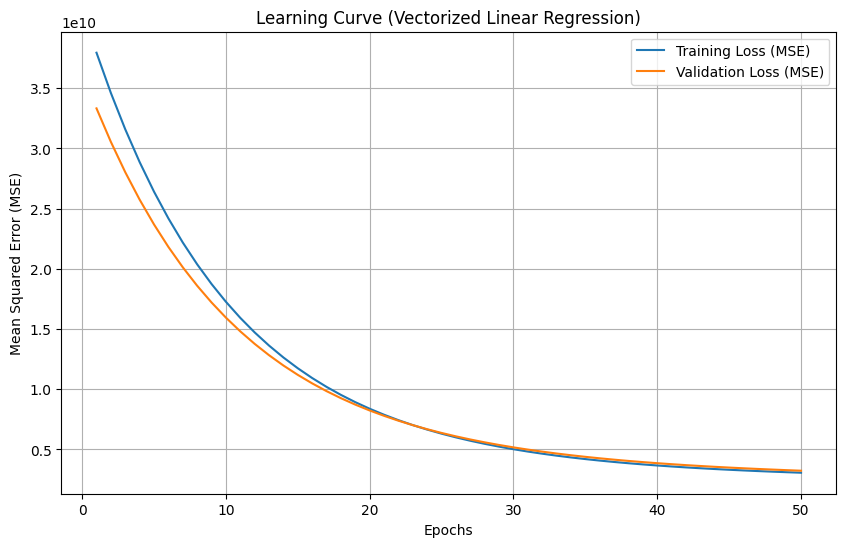

In [3428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (selected features)
df = dataset[selected_features_final1.tolist() + ['SalePrice']]

# Correct X and y
X = df[selected_features_final1] # Features (selected features only)
y = df['SalePrice']  # Target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Fold Cross-Validation (Validation set is selected in each fold)
kf = KFold(n_splits=9, shuffle=True, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate models using K-Fold Cross-Validation
results = {}
for name, model in models.items():
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []

    for train_idx, val_idx in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mae_list.append(mean_absolute_error(y_val, y_pred))
        mse_list.append(mean_squared_error(y_val, y_pred))
        rmse_list.append(np.sqrt(mse_list[-1]))
        r2_list.append(r2_score(y_val, y_pred))

    results[name] = (np.mean(mae_list), np.mean(mse_list), np.mean(rmse_list), np.mean(r2_list))

# Display results
print("\nModel Performance on Validation Set (K-Fold CV):")
for name, (mae, mse, rmse, r2) in results.items():
    print(f"{name}:\n  MAE: {mae:.4f}\n  MSE: {mse:.4f}\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")

# Select best model (highest average R2 score)
best_model_name = max(results, key=lambda x: results[x][3])
best_model = models[best_model_name]
print(f"Best Model Before Tuning: {best_model_name}\n")

# Hyperparameter tuning for the best model
if isinstance(best_model, Ridge) or isinstance(best_model, Lasso):
    param_grid = {"alpha": np.logspace(-4, 4, 10)}
elif "Polynomial" in best_model_name:
    param_grid = {"polynomialfeatures__degree": [2, 3, 4]}
elif isinstance(best_model, LinearRegression):
    param_grid = {"fit_intercept": [True, False]}
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_val, y_train_val)
    tuned_model = grid_search.best_estimator_

    # Training Error
    y_train_pred = tuned_model.predict(X_train_val)
    train_mae = mean_absolute_error(y_train_val, y_train_pred)
    train_mse = mean_squared_error(y_train_val, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train_val, y_train_pred)

    # Test Error
    y_test_pred = tuned_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nModel Performance After Tuning:")
    print(f"{best_model_name} (Training Set):")
    print(f"  MAE: {train_mae:.4f}\n  MSE: {train_mse:.4f}\n  RMSE: {train_rmse:.4f}\n  R2 Score: {train_r2:.4f}\n")

    print(f"{best_model_name} (Test Set):")
    print(f"  MAE: {test_mae:.4f}\n  MSE: {test_mse:.4f}\n  RMSE: {test_rmse:.4f}\n  R2 Score: {test_r2:.4f}\n")

    print(f"Best Parameters: {grid_search.best_params_}")

# ====================================================
# 1. Vectorized Linear Regression Model with Gradient Descent
# ====================================================

class VectorizedLinearRegression:
    def __init__(self, learning_rate=0.09, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.train_loss = []
        self.val_loss = []

        for epoch in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track training loss
            train_mse = mean_squared_error(y, y_pred)
            self.train_loss.append(train_mse)

            # Track validation loss (if validation set is provided)
            if hasattr(self, 'X_val'):
                y_val_pred = np.dot(self.X_val, self.weights) + self.bias
                val_mse = mean_squared_error(self.y_val, y_val_pred)
                self.val_loss.append(val_mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Prepare data for vectorized linear regression
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Train vectorized linear regression
vectorized_model = VectorizedLinearRegression(learning_rate=0.01, epochs=50)
vectorized_model.X_val = X_val  # Pass validation set
vectorized_model.y_val = y_val
vectorized_model.fit(X_train, y_train)

# Plot learning curve for vectorized model
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), vectorized_model.train_loss, label="Training Loss (MSE)")
plt.plot(range(1, 51), vectorized_model.val_loss, label="Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve (Vectorized Linear Regression)")
plt.legend()
plt.grid()
plt.show()

In [3418]:
def process_and_predict(new_csv_file, model, selected_features):
    new_data = pd.read_csv(new_csv_file)
    ids = new_data['Id']

    processed_data = new_data.drop(columns=['Id'])
    processed_data = drop_columns(new_data, columns_to_drop)
    processed_data = replace_missing_values(processed_data)

    for col in processed_data.select_dtypes(include=['object']).columns:
        processed_data[col].fillna("No", inplace=True)

    for col in processed_data.select_dtypes(include=['number']).columns:
        processed_data[col].fillna(0, inplace=True)

    engineered_data = run_pipeline(processed_data)

    predictions = model.predict(engineered_data[selected_features])
    predictions = pd.DataFrame({'Id': ids, 'SalePrice': predictions})

    return predictions

In [3426]:
new_csv_file = "/content/drive/MyDrive/Machine Learning/test.csv"
predictions = process_and_predict(new_csv_file, best_model, selected_features_final1)

output_file = "/content/drive/MyDrive/Machine Learning/predictions.csv"
# predictions.to_csv(output_file, index=False) # Save predictions DataFrame directly

# print(f"Predictions saved to {output_file}")

<ipython-input-3380-12088edbe1d0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['LotFrontage'].fillna(dataset[dataset['BldgType'] == '2fmCon']['LotFrontage'].median(), inplace=True)
<ipython-input-3380-12088edbe1d0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Non-finite values in each column:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64 

In [3427]:
# Load the prediction and desired prediction files
# predictions_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/predictions.csv")
desired_predictions_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/desired_Predictions.csv")  # Replace with actual file path

# Merge the DataFrames on 'Id'
merged_df = pd.merge(predictions, desired_predictions_df, on='Id', suffixes=('_pred', '_desired'))

# Calculate accuracy metrics
mse = mean_squared_error(merged_df['SalePrice_desired'], merged_df['SalePrice_pred'])
rmse = np.sqrt(mse)
r2 = r2_score(merged_df['SalePrice_desired'], merged_df['SalePrice_pred'])

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 352038711.2078
Root Mean Squared Error (RMSE): 18762.6947
R-squared (R2): 0.9418
